# Predicting Airbnb Revenue on 2019 Host Listings and Exploring the Impact of COVID-19 on 2020 Listing Prices in New York City
#### Team 3B (Yulong Gong, Peter Mankiewich, Ruchika Venkateswaran, Yi-shuan Wang, Yangyang Zhou)

---

## Project Objectives
Our objective is to predict the revenue for Airbnb listings in New York City from 2019-2020 across the 5 boroughs and understand which boroughs have higher business opportunities for Airbnb based on the neighbourhood popularity, nature of the host and revenue generated per neighborhood. Additionally, we also aim to draw comparisons between listing prices and host reviews pre and post COVID-19. More detailed objectives are outlined below:

#### Revenue Prediction
* Predict the price of each Airbnb listing in New York City using data between 2019-2020
* Analyze the impact of COVID-19 on 2020 listing prices and revenue 

#### Most Popular Neighborhoods
* Analyze neighborhood popularity by traffic (number of listings in each borough and neighborhood)
* Analyze neighborhood popularity by price of listings (examine if the most popular neighborhoods are listed at lower prices)
* Analyze neighborhood popularity by availability (number of days each listing is available)

#### Understand Host Behavior/Nature of the Host
* Type of rooms rented out by hosts (Private Rooms/Shared Rooms/Entire Apartment)
* Hosts with highest number of reviews 
* Listing name(terms used by hosts to describe the space and area)



## Dataset Overview
Our data has been taken from 4 files as listed below. The datasets have been taken from [InsideAirbnb](http://insideairbnb.com/get-the-data.html) and were last updated in October 2020.


1. [Listings](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/listings.csv.gz) (Detailed listings data for New York City.)
2. [Reviews](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/reviews.csv.gz) (Detailed review data for listings in New York City.)
3. [Calendar](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/calendar.csv.gz) (Detailed calendar data for listings in New York City.)
4. [Neighborhoods](http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/visualisations/neighbourhoods.csv) (Neighbourhood list for geo filter. Sourced from city or open source GIS files.)



# Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math
from os import path

# plotly imports
! pip install plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

! pip install wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# folium imports
! pip install folium
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

# Reading in Data

In [2]:
listings = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/listings.csv.gz")
calendar = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/calendar.csv.gz")
reviews = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/data/reviews.csv.gz", parse_dates=['date'])
neighborhoods = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-10-05/visualisations/neighbourhoods.csv")

# Inspecting the Listings DataFrame


**Here is a glimpse of the Listings dataframe.**

In [3]:
listings.head(2)

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20201005145859   2020-10-07   
1  3831  https://www.airbnb.com/rooms/3831  20201005145859   2020-10-09   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                         9.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                    9.0                 9.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.36  
1                                           0              4.82  

[2 rows x 74 columns]

**How many observations and features are in the Listings dataframe?**

There are 44666 unique observations (listings) and 74 features.

In [4]:
# Display the number of rows and columns of the dataframe
listings.shape

(44666, 74)

In [5]:
# Display the number of unique ids
len(listings.id.unique())

44666

**Here is an overview of the Listings dataframe.**

In [6]:
# View the data types and non-null count for each feature
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            44666 non-null  int64  
 1   listing_url                                   44666 non-null  object 
 2   scrape_id                                     44666 non-null  int64  
 3   last_scraped                                  44666 non-null  object 
 4   name                                          44650 non-null  object 
 5   description                                   43385 non-null  object 
 6   neighborhood_overview                         28207 non-null  object 
 7   picture_url                                   44666 non-null  object 
 8   host_id                                       44666 non-null  int64  
 9   host_url                                      44666 non-null 

**Summary statistics for the Listings dataframe.**

In [7]:
# Summary statistics for the numeric columns
listings.describe()

id     scrape_id       host_id  host_listings_count  \
count  4.466600e+04  4.466600e+04  4.466600e+04         44649.000000   
mean   2.322711e+07  2.020101e+13  8.531840e+07            15.817622   
std    1.398212e+07  2.847688e+00  1.001533e+08           117.936134   
min    2.595000e+03  2.020101e+13  2.438000e+03             0.000000   
25%    1.055507e+07  2.020101e+13  9.354841e+06             1.000000   
50%    2.226606e+07  2.020101e+13  3.785493e+07             1.000000   
75%    3.623950e+07  2.020101e+13  1.373589e+08             2.000000   
max    4.573092e+07  2.020101e+13  3.705121e+08          2114.000000   

       host_total_listings_count      latitude     longitude  accommodates  \
count               44649.000000  44666.000000  44666.000000  44666.000000   
mean                   15.817622     40.729714    -73.950756      2.758250   
std                   117.936134      0.055180      0.047505      1.803448   
min                     0.000000     40.508680    -74.239860      0.000000   
25%                     1.000000     40.689880    -73.982980      2.000000   
50%                     1.000000     40.724560    -73.955285      2.000000   
75%                     2.000000     40.763350    -73.933980      4.000000   
max                  2114.000000     40.911690    -73.711930     16.000000   

       bathrooms      bedrooms  ...  review_scores_checkin  \
count        0.0  40407.000000  ...           33055.000000   
mean         NaN      1.291880  ...               9.724459   
std          NaN      0.681161  ...               0.810329   
min          NaN      1.000000  ...               2.000000   
25%          NaN      1.000000  ...              10.000000   
50%          NaN      1.000000  ...              10.000000   
75%          NaN      1.000000  ...              10.000000   
max          NaN     21.000000  ...              10.000000   

       review_scores_communication  review_scores_location  \
count                 33075.000000            33050.000000   
mean                      9.727498                9.594191   
std                       0.827889                0.800604   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  license  calculated_host_listings_count  \
count         33051.000000      0.0                    44666.000000   
mean              9.386070      NaN                        6.668338   
std               0.986716      NaN                       24.854672   
min               2.000000      NaN                        1.000000   
25%               9.000000      NaN                        1.000000   
50%              10.000000      NaN                        1.000000   
75%              10.000000      NaN                        2.000000   
max              10.000000      NaN                      239.000000   

       calculated_host_listings_count_entire_homes  \
count                                 44666.000000   
mean                                      3.623114   
std                                      19.911581   
min                                       0.000000   
25%                                       0.000000   
50%                                       1.000000   
75%                                       1.000000   
max                                     239.000000   

       calculated_host_listings_count_private_rooms  \
count                                  44666.000000   
mean                                       2.845072   
std                                       13.939286   
min                                        0.000000   
25%                                        0.000000   
50%                                        1.000000   
75%                                

In [8]:
# Summary statistics for columns that are objects (We will convert these to more appropriate data types later in the notebook)
listings.describe(include=['O'])

listing_url last_scraped  \
count                                   44666        44666   
unique                                  44666            9   
top     https://www.airbnb.com/rooms/11697308   2020-10-07   
freq                                        1         9946   

                       name  \
count                 44650   
unique                43418   
top     Home away from home   
freq                     24   

                                              description  \
count                                               43385   
unique                                              41712   
top     The property features full time security and r...   
freq                                                   47   

                                    neighborhood_overview  \
count                                               28207   
unique                                              24295   
top     This furnished apartment is located in Midtown...   
freq                                                   44   

                                              picture_url  \
count                                               44666   
unique                                              43941   
top     https://a0.muscache.com/pictures/6bfef955-b924...   
freq                                                   10   

                                           host_url host_name  host_since  \
count                                         44666     44649       44649   
unique                                        33920     10732        3966   
top     https://www.airbnb.com/users/show/107434423   Michael  2016-12-16   
freq                                            239       368         252   

                            host_location  ...     property_type  \
count                               44524  ...             44666   
unique                               1570  ...                84   
top     New York, New York, United States  ...  Entire apartment   
freq                                28625  ...             18579   

              room_type bathrooms_text amenities    price has_availability  \
count             44666          44576     44666    44666            44666   
unique                4             35     39612     1163                2   
top     Entire home/apt         1 bath        []  $100.00                t   
freq              22860          23173       168     1633            44660   

       calendar_last_scraped first_review last_review instant_bookable  
count                  44666        34149       34149            44666  
unique                     9         3231        2198                2  
top               2020-10-07   2020-01-01  2020-01-01                f  
freq                    9946          146         681            29619  

[4 rows x 34 columns]

# Inspecting the Calendar DataFrame

**Here is a glimpse of the Listings dataframe.**

In [9]:
calendar.head(2)

listing_id        date available    price adjusted_price  minimum_nights  \
0        2595  2020-10-07         t  $175.00        $175.00             3.0   
1        2595  2020-10-08         t  $175.00        $175.00             3.0   

   maximum_nights  
0          1125.0  
1          1125.0

**How many observations and features are in the Calendar dataframe?**

There are 16305584 observations and 7 features.



In [10]:
# Display the number of rows and columns of the dataframe
calendar.shape

(16305584, 7)

**Here is an overview of the Calendar dataframe.**

In [11]:
# View the data types and non-null count for each feature
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16305584 entries, 0 to 16305583
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 870.8+ MB


**Summary statistics for the Calendar dataframe.**

In [12]:
# Summary statistics for the numeric columns (Price will be converted from an object later in the notebook)
calendar[['minimum_nights','maximum_nights']].describe()

minimum_nights  maximum_nights
count    1.630059e+07    1.630059e+07
mean     1.295762e+01    2.212913e+06
std      5.709821e+01    6.887565e+07
min      1.000000e+00    1.000000e+00
25%      2.000000e+00    3.100000e+01
50%      3.000000e+00    1.125000e+03
75%      7.000000e+00    1.125000e+03
max      1.250000e+03    2.147484e+09

# Inspecting the Reviews DataFrame

**Here is a glimpse of the Reviews dataframe.**

In [13]:
reviews.head(2)

listing_id     id       date  reviewer_id reviewer_name  \
0        2595  17857 2009-11-21        50679          Jean   
1        2595  19176 2009-12-05        53267          Cate   

                                            comments  
0  Notre séjour de trois nuits.\r\nNous avons app...  
1                                  Great experience.

**How many observations and features are in the Reviews dataframe?**

There are 1003064 unique observations (comments) and 6 features.

In [14]:
# Display the number of rows and columns of the dataframe
reviews.shape

(1003064, 6)

In [15]:
# Display the number of unique ids
len(reviews.id.unique())

1003064

**Here is an overview of the Reviews dataframe.**

In [16]:
# View the data types and non-null count for each feature
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003064 entries, 0 to 1003063
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   listing_id     1003064 non-null  int64         
 1   id             1003064 non-null  int64         
 2   date           1003064 non-null  datetime64[ns]
 3   reviewer_id    1003064 non-null  int64         
 4   reviewer_name  1003056 non-null  object        
 5   comments       1002383 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 45.9+ MB


# Inspecting the Neighborhoods DataFrame

**Here is a glimpse of the Neighborhoods dataframe.**

In [17]:
neighborhoods.head()

neighbourhood_group neighbourhood
0               Bronx      Allerton
1               Bronx    Baychester
2               Bronx       Belmont
3               Bronx     Bronxdale
4               Bronx   Castle Hill

**How many observations and features are in the Neighborhoods dataframe?**

There are 230 unique observations (neighborhoods) and 2 features.

In [18]:
# Display the number of rows and columns of the dataframe
neighborhoods.shape

(230, 2)

In [19]:
# Display the number of unique neighborhoods
len(neighborhoods.neighbourhood.unique())

230

**Here is an overview of the Neighborhoods dataframe.**

In [20]:
# View the data types and non-null count for each feature
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood_group  230 non-null    object
 1   neighbourhood        230 non-null    object
dtypes: object(2)
memory usage: 3.7+ KB


**Summary statistics for the Neighborhoods dataframe.**

In [21]:
neighborhoods.describe()

neighbourhood_group neighbourhood
count                  230           230
unique                   5           230
top                 Queens  Emerson Hill
freq                    53             1

**How many neighborhoods are there in each borough?**

53 neighborhoods are in Queens while 32 are in Manhattan.

In [22]:
neighborhoods.groupby('neighbourhood_group').count()

neighbourhood
neighbourhood_group               
Bronx                           49
Brooklyn                        48
Manhattan                       32
Queens                          53
Staten Island                   48

**A preview of the neighborhoods within a borough.**

In [24]:
# Take Manhattan for example
neighborhoods[neighborhoods['neighbourhood_group'] == "Manhattan"].head()

neighbourhood_group      neighbourhood
97            Manhattan  Battery Park City
98            Manhattan            Chelsea
99            Manhattan          Chinatown
100           Manhattan       Civic Center
101           Manhattan        East Harlem

# Cleaning the Listings DataFrame

After inspecting the Listings dataframe, we now proceed to analyze potential misssing values and outliers. We will also ensure that data within each of the columns is of the right datatype and format, and is ready to be used in the rest of the EDA phase.

**How many missing values are there in each column?**

There are three empty columns -- "bathrooms", "calendar_updated", and "license".

In [25]:
null_vals = listings.isnull().sum()
null_vals[null_vals > 0].sort_values(ascending=False)

bathrooms                      44666
calendar_updated               44666
license                        44666
host_response_time             23079
host_response_rate             23079
host_about                     17874
host_acceptance_rate           16865
neighborhood_overview          16459
neighbourhood                  16458
review_scores_location         11616
review_scores_value            11615
review_scores_checkin          11611
review_scores_accuracy         11596
review_scores_communication    11591
review_scores_cleanliness      11583
review_scores_rating           11564
reviews_per_month              10517
first_review                   10517
last_review                    10517
host_neighbourhood              7280
bedrooms                        4259
description                     1281
beds                             513
host_location                    142
bathrooms_text                    90
host_total_listings_count         17
host_listings_count               17
h

**Converting "price" column to the correct format and data type.**

In [26]:
# First converting price into a string to remove '$' and ',' and then converting it into a float 
listings['price'] = listings['price'].astype('string')
listings['price'] = listings['price'].str.replace('$','')
listings['price'] = listings['price'].str.replace(',','')
listings['price'] = listings['price'].astype('float')
listings['price']

0        175.0
1         76.0
2         60.0
3        175.0
4         73.0
         ...  
44661     50.0
44662    200.0
44663     92.0
44664    120.0
44665     54.0
Name: price, Length: 44666, dtype: float64

**How many listings are with a price of $0?**

There are 25 observations (listings) where the price is $0.

In [27]:
# Identifying rows with price of the listing as $0
listings[listings['price'] == 0]['price'].count()

25

**How many listings have no beds?**

There are 1595 listings with no beds, which equals to 3.57% of the total number of listings.

In [28]:
# Identifying rows with no beds
listings[listings['beds'] == 0]['beds'].count() / len(listings)

0.03570948820131644

**Which listing has the most beds?**

We learned from the summary statistics that the maximum number of beds is 40 among all listings. After inspecting this outlier, we found that this observation is reasonable and should not be dropped from the dataframe since it says it hosts 16 people.

In [29]:
# Inspecting rows with 40 beds
listings[listings['beds'] == 40]

id                           listing_url       scrape_id  \
2978  2261367  https://www.airbnb.com/rooms/2261367  20201005145859   

     last_scraped                                 name  \
2978   2020-10-09  brooklyn 14 bedroom gated community   

                                            description  \
2978  One of a kind in Brooklyn!  A huge home it inc...   

                                  neighborhood_overview  \
2978  Sea Gate is a hidden gem.  In the summer the o...   

                                            picture_url   host_id  \
2978  https://a0.muscache.com/pictures/5cc30306-6ac0...  10416706   

                                        host_url  ...  \
2978  https://www.airbnb.com/users/show/10416706  ...   

     review_scores_communication review_scores_location review_scores_value  \
2978                        10.0                   10.0                10.0   

     license instant_bookable calculated_host_listings_count  \
2978     NaN                t                              1   

     calculated_host_listings_count_entire_homes  \
2978                                           1   

     calculated_host_listings_count_private_rooms  \
2978                                            0   

     calculated_host_listings_count_shared_rooms reviews_per_month  
2978                                           0              0.22  

[1 rows x 74 columns]

We will drop all observations in which the price, number of beds, or accommodates is zero since these values would not make sense in context.

In [30]:
drop_df = listings[(listings['beds'] == 0) | (listings['price'] == 0) | (listings['accommodates'] == 0)].index
listings.drop(drop_df, inplace=True)

We will also remove observations with missing values in any of these columns.

In [31]:
listings.dropna(subset=['first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month'], thresh=10, inplace=True)

Lastly, we decide to drop the columns that are not significant to EDA and furthur analysis.

In [32]:
listings.drop(['scrape_id', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'bathrooms','calendar_updated','license', 'host_total_listings_count', 'calendar_last_scraped'], axis=1, inplace=True)

After cleaning the Listings dataframe, we now have 31880 unique observations (listings) and 60 features.

In [33]:
listings.shape

(31880, 60)

**How many listings have no availability within 30 days?**

On the day the data was scraped from Airbnb, there are 19197 listings with no availability within the next 30 days.

In [34]:
listings[listings['availability_30'] == 0]['id'].count()

19197

**How many listings have no availability within 60 days?**

On the day the data was scraped from Airbnb, there are 17819 listings with no availability within the next 60 days.

In [35]:
listings[listings['availability_60'] == 0]['id'].count()

17819

**How many listings have no availability within 90 days?**

On the day the data was scraped from Airbnb, there are 16329 listings with no availability within the next 90 days.

In [36]:
listings[listings['availability_90'] == 0]['id'].count()

16329

**How many listings have no availability within a year?**

On the day the data was scraped from Airbnb, there are 15230 listings with no availability within one year.

In [37]:
# check to see how many listings have no availability within one year
listings[listings['availability_365'] == 0]['id'].count()

15230

## Looking into Host-Related Data

**Are there any missing values within host-related data?**

<AxesSubplot:>

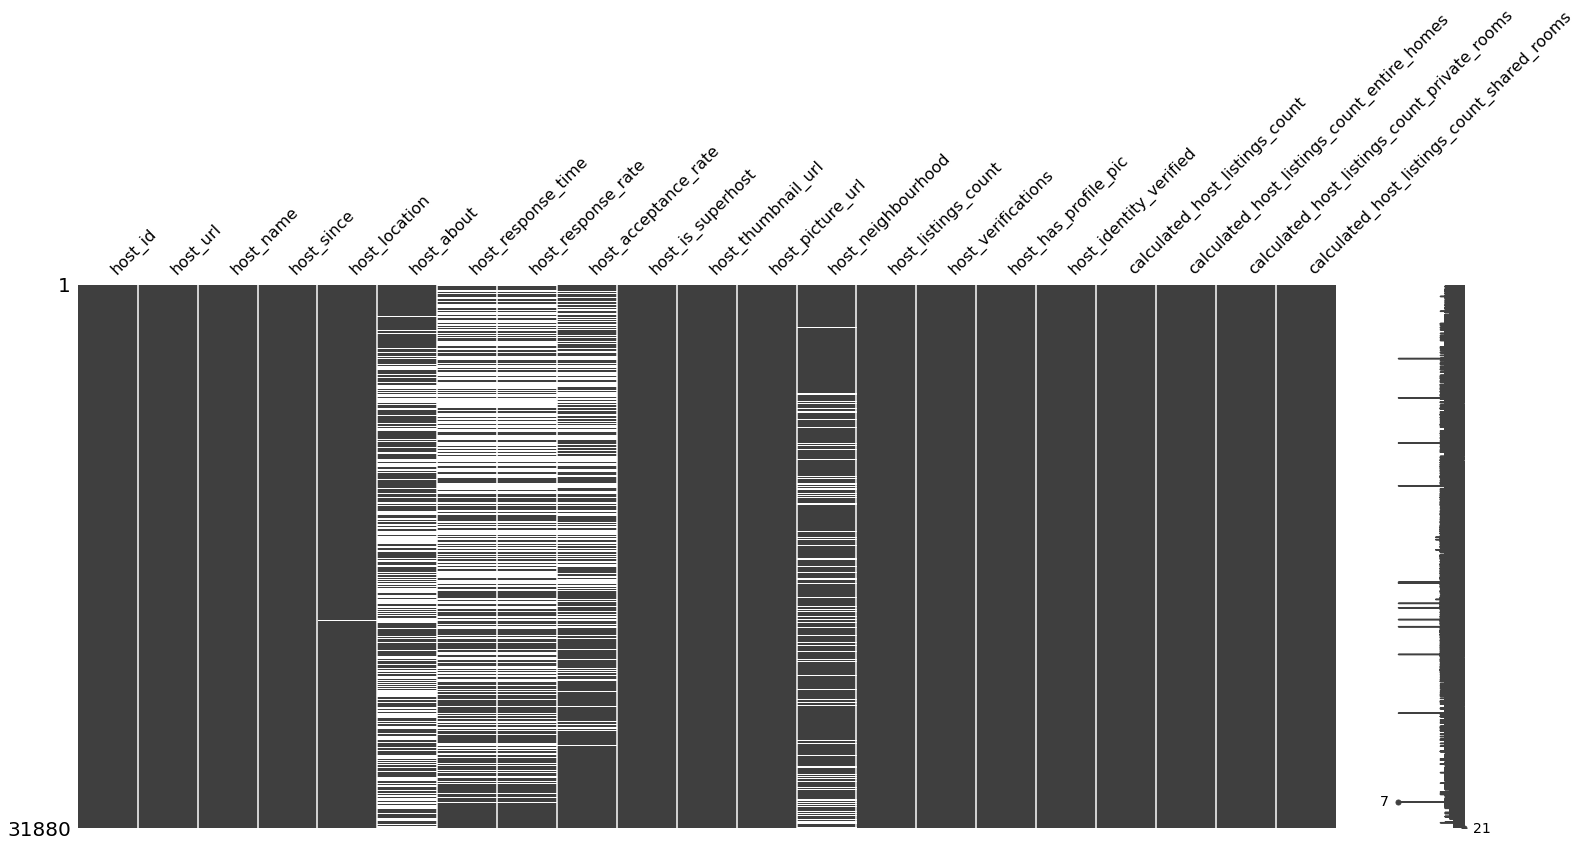

In [38]:
msno.matrix(listings[['host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms']])

**Converting columns to the correct data type.**

In [39]:
listings.calculated_host_listings_count_shared_rooms = listings.calculated_host_listings_count_shared_rooms.astype('float')
listings.calculated_host_listings_count_private_rooms = listings.calculated_host_listings_count_private_rooms.astype('float')
listings.calculated_host_listings_count_entire_homes = listings.calculated_host_listings_count_entire_homes.astype('float')
listings.calculated_host_listings_count = listings.calculated_host_listings_count.astype('float')

Check to see that all host_listing types sum up to the total listings offered by the host and cross check that the value for the shared room type is greater than 0.

In [40]:
listings[listings['room_type'] == 'Shared room'][['calculated_host_listings_count','calculated_host_listings_count_shared_rooms','calculated_host_listings_count_private_rooms','calculated_host_listings_count_entire_homes','room_type']].head()

calculated_host_listings_count  \
155                             1.0   
429                             1.0   
757                             1.0   
779                             1.0   
887                             1.0   

     calculated_host_listings_count_shared_rooms  \
155                                          1.0   
429                                          1.0   
757                                          1.0   
779                                          1.0   
887                                          1.0   

     calculated_host_listings_count_private_rooms  \
155                                           0.0   
429                                           0.0   
757                                           0.0   
779                                           0.0   
887                                           0.0   

     calculated_host_listings_count_entire_homes    room_type  
155                                          0.0  Shared room  
429                                          0.0  Shared room  
757                                          0.0  Shared room  
779                                          0.0  Shared room  
887                                          0.0  Shared room

**Are there any row where the numbers don't add up?**

Rows that don't add up to the host_listings_count (total column) have data missing for hotel room type. There is no breakout column for this type of room and the aggregation falls short of the total.


In [41]:
check_condition = (listings['calculated_host_listings_count_private_rooms'] + listings['calculated_host_listings_count_entire_homes'] + listings['calculated_host_listings_count_shared_rooms']) != listings['calculated_host_listings_count']
listings[check_condition].head(3)

id                         listing_url last_scraped  \
257  77765  https://www.airbnb.com/rooms/77765   2020-10-08   
260  80684  https://www.airbnb.com/rooms/80684   2020-10-11   
261  80700  https://www.airbnb.com/rooms/80700   2020-10-08   

                                    name  \
257                 Superior @ Box House   
260  Duplex w/ Terrace @ Box House Hotel   
261    Loft w/ Terrace @ Box House Hotel   

                                           description neighborhood_overview  \
257  <b>The space</b><br />Charming standard queen ...                   NaN   
260  This Duplex Loft Suite with a Terrace offers a...                   NaN   
261  This Loft Suite with a Private Terrace offers ...                   NaN   

                                           picture_url  host_id  \
257  https://a0.muscache.com/pictures/fe864e89-6454...   417504   
260  https://a0.muscache.com/pictures/21910837/bbb7...   417504   
261  https://a0.muscache.com/pictures/548472/60b07f...   417504   

                                     host_url            host_name  ...  \
257  https://www.airbnb.com/users/show/417504  The Box House Hotel  ...   
260  https://www.airbnb.com/users/show/417504  The Box House Hotel  ...   
261  https://www.airbnb.com/users/show/417504  The Box House Hotel  ...   

    review_scores_checkin review_scores_communication review_scores_location  \
257                  10.0                        10.0                    9.0   
260                  10.0                        10.0                    9.0   
261                  10.0                        10.0                    7.0   

    review_scores_value instant_bookable calculated_host_listings_count  \
257                10.0                f                           26.0   
260                 9.0                f                           26.0   
261                10.0                f                           26.0   

    calculated_host_listings_count_entire_homes  \
257                                        16.0   
260                                        16.0   
261                                        16.0   

    calculated_host_listings_count_private_rooms  \
257                                          6.0   
260                                          6.0   
261                                          6.0   

    calculated_host_listings_count_shared_rooms reviews_per_month  
257                                         0.0              0.33  
260                                         0.0              0.07  
261                                         0.0              0.06  

[3 rows x 60 columns]

After adding up the count of all room types, the total does not exceed the calculated_host_listings_count.

In [42]:
check_condition = (listings['calculated_host_listings_count_private_rooms'] + listings['calculated_host_listings_count_entire_homes'] + listings['calculated_host_listings_count_shared_rooms']) > listings['calculated_host_listings_count']
listings[check_condition]

Empty DataFrame
Columns: [id, listing_url, last_scraped, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month]
Index: []

[0 rows x 60 columns]

**Examine the distribution of the host acceptance rate.**

In [43]:
listings['host_acceptance_rate'].value_counts()

100%    7126
0%       938
97%      872
98%      837
99%      814
        ... 
15%        3
7%         2
6%         2
5%         1
34%        1
Name: host_acceptance_rate, Length: 97, dtype: int64

**Converting columns to the correct format and data type.**

In [44]:
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].astype("string")
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.replace('%','')
listings['host_acceptance_rate'] = pd.to_numeric(listings['host_acceptance_rate'], errors='coerce')
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].apply(lambda x: x/100 if isinstance(x, float) else None)

Check to ensure the host_response_rate column is of the correct data type.

In [45]:
listings['host_acceptance_rate'].dtype

dtype('float64')

**Examine the distribution of the host acceptance rate again.**

In [46]:
listings['host_acceptance_rate'].value_counts()

1.00    7126
0.00     938
0.97     872
0.98     837
0.99     814
        ... 
0.08       3
0.06       2
0.07       2
0.34       1
0.05       1
Name: host_acceptance_rate, Length: 97, dtype: int64

**How many null values are there?**

There are 10147 null values in host_acceptance_rate because Airbnb did not report this for sellers with less reviews and data. We chose to ignore them at this point.

In [47]:
listings['host_acceptance_rate'].isnull().sum()

10147

**Examine the distribution of the host reponse rate.**

In [48]:
listings['host_response_rate'].value_counts()

100%    10307
0%        745
90%       737
80%       478
50%       386
        ...  
35%         1
36%         1
28%         1
8%          1
16%         1
Name: host_response_rate, Length: 75, dtype: int64

**Converting the columns to the correct format and data types.**

In [49]:
listings['host_response_rate'] = listings['host_response_rate'].astype("string")
listings['host_response_rate'] = listings['host_response_rate'].str.replace('%','')
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'], errors='coerce')
listings['host_response_rate'] = listings['host_response_rate'].apply(lambda x: x/100 if isinstance(x, float) else None)
listings['host_response_time'] = listings['host_response_time'].astype('string')
listings['host_is_superhost'] = listings['host_is_superhost'].astype('string')

**Examine the distribution of host_response_time.**

In [50]:
listings[['host_response_time']].value_counts().reset_index()

host_response_time     0
0      within an hour  8592
1  within a few hours  3739
2        within a day  2662
3  a few days or more  1228

**What is the average response rate for each response time category?**

Hosts who response within an hour have a 97.7% response rate on average.

In [51]:
listings.groupby('host_response_time')['host_response_rate'].mean()

host_response_time
a few days or more    0.120106
within a day          0.824230
within a few hours    0.947943
within an hour        0.977199
Name: host_response_rate, dtype: float64

**What is the relationship between response rate and response time?**

Below is a visualization of the relationship between them. We found that hosts who usually reponse within an hour have the highest response rate on average, while hosts who tend to response after a few days or more have the lowest response rate.

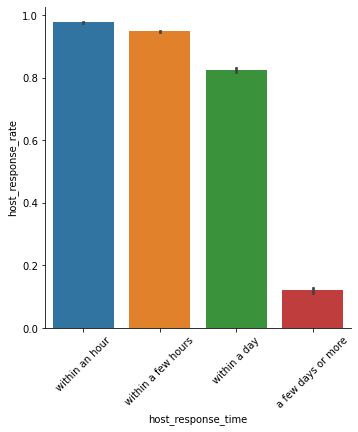

In [53]:
sns.catplot(x='host_response_time', y='host_response_rate', data=listings, kind='bar', order=['within an hour', 'within a few hours', 'within a day', 'a few days or more'])
plt.xticks(rotation =45)
plt.show();

**Is there is a relationship between acceptance rate and response rate?**

Below is a visualization of host acceptance rate and response rate and there doesn't seem to be an obvious relationship. It is possible that a popular host only respond to messages sent by the few guests he/she accepts and not responding to those he/she does not want to accept, or that a host is constantly declining requests via messages.

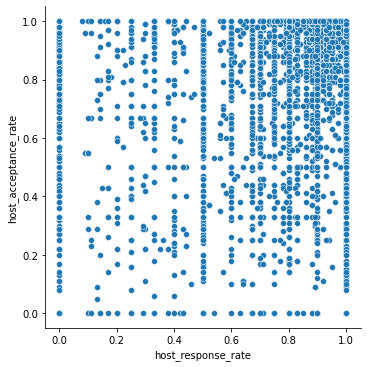

In [55]:
sns.relplot(x='host_response_rate', y='host_acceptance_rate', data=listings, kind='scatter')
plt.show();

**Encoding "host_is_superhost" and "host_identity_verified" values "T" and "F" to 1 and 0 respectively and creating separate column for binary variables.**

In [56]:
key = {'t' : 1, 'f' : 0} 
listings['is_superhost_numeric'] = listings['host_is_superhost']
listings = listings.replace({"is_superhost_numeric": key})

listings['host_identity_verified'] = listings['host_identity_verified'].astype('string')
listings['host_identity_verified_numeric'] = listings['host_identity_verified']
listings = listings.replace({"host_identity_verified_numeric": key}) 

**Converting host_since, first_review, last_review and last_scraped to datetime.**

In [57]:
listings['host_since'] = pd.to_datetime(listings['host_since'])
listings['first_review'] = pd.to_datetime(listings['first_review'])
listings['last_review'] = pd.to_datetime(listings['last_review'])
listings['last_scraped'] = pd.to_datetime(listings['last_scraped'])

We examined the listings dataframe and found that the listing_id is unique (each row represents a unique listing), but host_id is repeated when one host has multiple listings. For example, the below view shows that host_id 2787 has five listings. There are a number of columns that are repeated for each row. For example, host_acceptance_rate is 0.91 for each of the 5 rows below. In order to specifically analyze host data and avoid repeated datapoints, we will remove duplicate host id's.

In [58]:
listings[listings['host_id'] == 2787]

id                            listing_url last_scraped  \
8302    7937553   https://www.airbnb.com/rooms/7937553   2020-10-08   
10879  10160215  https://www.airbnb.com/rooms/10160215   2020-10-08   
10968  10267242  https://www.airbnb.com/rooms/10267242   2020-10-08   
11192  10593675  https://www.airbnb.com/rooms/10593675   2020-10-08   
16993  17263207  https://www.airbnb.com/rooms/17263207   2020-10-09   

                                                    name  \
8302   Riomaggiore Room. Queen Bedroom in Bklyn Townh...   
10879                               Torre del Lago Room.   
10968        Corona free.  Clean and Quiet Queen Bedroom   
11192  La Spezia rm.  Clean, quiet and available tonight   
16993               Corona free and clean. Liguria room.   

                                             description  \
8302   The  Riomaggione Room features and amenities:<...   
10879  The  Torre de Lago Room features and amenities...   
10968  The Cinque Terre Room features and amenities:<...   
11192  *Clean and comfortable full sized futon bed.  ...   
16993  *Clean and comfortable room with twin bed for ...   

                                   neighborhood_overview  \
8302   The neighborhood is a quiet, tree lined reside...   
10879  We live on a quiet, treelined street.  Restaur...   
10968  Quiet tree lined residential area, near conven...   
11192                     Quiet residential neighborhood   
16993  Quiet, tree lined residential area with amenit...   

                                             picture_url  host_id  \
8302   https://a0.muscache.com/pictures/1d4a5019-6fea...     2787   
10879  https://a0.muscache.com/pictures/109e6454-e022...     2787   
10968  https://a0.muscache.com/pictures/fea7f1aa-29a2...     2787   
11192  https://a0.muscache.com/pictures/64bcce93-7184...     2787   
16993  https://a0.muscache.com/pictures/56e9a5f6-0acd...     2787   

                                     host_url host_name  ...  \
8302   https://www.airbnb.com/users/show/2787      John  ...   
10879  https://www.airbnb.com/users/show/2787      John  ...   
10968  https://www.airbnb.com/users/show/2787      John  ...   
11192  https://www.airbnb.com/users/show/2787      John  ...   
16993  https://www.airbnb.com/users/show/2787      John  ...   

      review_scores_location review_scores_value instant_bookable  \
8302                    10.0                10.0                f   
10879                    9.0                10.0                f   
10968                    9.0                10.0                f   
11192                   10.0                 9.0                f   
16993                    9.0                 9.0                f   

      calculated_host_listings_count  \
8302                             7.0   
10879                            7.0   
10968                            7.0   
11192                            7.0   
16993                            7.0   

       calculated_host_listings_count_entire_homes  \
8302                                           1.0   
10879                                          1.0   
10968                                          1.0   
11192                                          1.0   
16993                                          1.0   

       calculated_host_listings_count_private_rooms  \
8302                                            4.0   
10879                                           4.0   
10968                                           4.0   
11192                                           4.0   
16993                                           4.0   

      calculated_host_listings_count_shared_rooms reviews_per_month  \
8302                                          2.0              0.48   
10879                                         2.0              0.40   
10968                                         2.0              0.57   
11192                                         2.0              0.40   
16993                               

**Creating a new dataframe called "hosts" to store host information.**

In [59]:
column_name = ['host_id']
hosts = listings.sort_values('host_id').drop_duplicates(subset=column_name)

We can confirm there are now no duplicates because no rows are returned below.


In [60]:
duplicates = hosts.duplicated(subset = column_name, keep = False)
hosts[duplicates].sort_values(by = column_name[0])

Empty DataFrame
Columns: [id, listing_url, last_scraped, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, is_superhost_numeric, host_identity_verified_numeric]
Index: []

[0 rows x 62 columns]

We now create a new calculated column so that we can determine the average price of properties per host.

In [61]:
average_price_per_host = listings.groupby('host_id')['price'].mean()
average_price_per_host_df = pd.DataFrame(average_price_per_host)
average_price_per_host_df = average_price_per_host_df.reset_index()
average_price_per_host_df = average_price_per_host_df.rename(columns={"price": "average_host_price"})
average_price_per_host_df.head()

host_id  average_host_price
0     2571               111.0
1     2782                95.0
2     2787               104.6
3     2845               175.0
4     2868                60.0

And join this dataframe with "hosts" on host_id so that there are averages for each host in the "hosts" dataframe. We now have 25038 unique observations (hosts) in the "hosts" dataframe.

In [62]:
hosts = hosts.merge(average_price_per_host_df, on='host_id')
len(hosts.id.unique())

25038

**What is a super host?**

A super host is someone who provides exceptional service. On Airbnb, these hosts can be identified with a badge. A full description of a super host can be found [here](https://www.airbnb.com/help/article/828/what-is-a-superhost). Since super hosts provide an extra level of service, we thought it would be interesting to subset the data by this feature for analysis.

**How many superhosts are there?**

There are 5363 superhosts and 19665 non-superhosts.

In [63]:
hosts['is_superhost_numeric'].value_counts()

0    19665
1     5363
Name: is_superhost_numeric, dtype: int64

About 21.42% of all the hosts are superhosts.

In [64]:
5363/25038

0.2141944244747983

**How many hosts completed identity verification?**

19608 hosts have verified their identification and 5420 hosts have not.

In [65]:
hosts['host_identity_verified_numeric'].value_counts()

1    19608
0     5420
Name: host_identity_verified_numeric, dtype: int64

**Creating two new dataframes, segmenting superhosts and non-superhosts.**

In [66]:
is_super_df = hosts[hosts.is_superhost_numeric == 1.0]
not_super_df = hosts[hosts.is_superhost_numeric == 0.0]

**Are there any listing with an unusual price?**

There are 19 listings (7.59% of all the listings) priced above $3000. We will analyze these outliers further below in our notebook and look at the links of each listing to cross-check the legitimacy of these listings.

In [67]:
hosts[hosts['price'] > 3000]['price'].count() / hosts['price'].count() * 100

0.07588465532390766

**How many of these outliers are owned by superhosts?**
2 of these listings are owned by superhosts and 17 of them are owned by non-superhosts.

In [68]:
is_super_df[is_super_df.price > 3000]['host_id'].count()

2

In [69]:
not_super_df[not_super_df.price > 3000]['host_id'].count()

17

# Cleaning the Neighborhood DataFrame

**Are the boroughs the same in "listings" and "neighborhoods" dataframes?**

Yes.

In [70]:
print(np.sort(listings.neighbourhood_group_cleansed.unique()))
print(np.sort(neighborhoods.neighbourhood_group.unique()))

['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']
['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island']


**How many unique neighborhoods are in the "listings" dataframe?**

There are 218 neighborhoods in the "listings" dataframe while there are 230 neighborhoods in total in New York City.

In [71]:
print(len(listings['neighbourhood_cleansed'].unique()))
print(len(neighborhoods['neighbourhood'].unique()))

218
230


**Is there any neighborhood in the "listings" dataframe not in the "neighborhoods" dataframe?**

No, all the neighborhoods appeared in the listings dataframe are included in the broader neighborhoods dataframe.

In [72]:
# The neighourhood in the listings are included in the neighbourhoods form, so we don't need to join these two forms together.
listings.loc[listings['neighbourhood_cleansed'].isin(neighborhoods['neighbourhood'])==False]

Empty DataFrame
Columns: [id, listing_url, last_scraped, name, description, neighborhood_overview, picture_url, host_id, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_listings_count, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, neighbourhood_group_cleansed, latitude, longitude, property_type, room_type, accommodates, bathrooms_text, bedrooms, beds, amenities, price, has_availability, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, first_review, last_review, review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, instant_bookable, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms, reviews_per_month, is_superhost_numeric, host_identity_verified_numeric]
Index: []

[0 rows x 62 columns]

# Cleaning the Reviews DataFrame

In [73]:
# Drop any missing comment from the dataframe
reviews.dropna(subset=['comments'], inplace=True)

**When was the oldest comment posted and when was the latest posted?**

The oldest comment was posted on April 23, 2009 and the latest was posted on October 11, 2020

In [74]:
print(reviews.date.min())
print(reviews.date.max())

2009-04-23 00:00:00
2020-10-11 00:00:00


In [75]:
# Create two columns that indicate the year and month where a comment was posted
reviews['year'] = reviews['date'].dt.year
reviews['month'] = reviews['date'].dt.month
reviews.head(1)

listing_id     id       date  reviewer_id reviewer_name  \
0        2595  17857 2009-11-21        50679          Jean   

                                            comments  year  month  
0  Notre séjour de trois nuits.\r\nNous avons app...  2009     11

# Cleaning the Calendar DataFrame

In [76]:
# Convert price to float
calendar["price"]=calendar["price"].str.replace("$","")
calendar["price"]=calendar["price"].str.replace(",","")
calendar["adjusted_price"]=calendar["adjusted_price"].str.replace("$","")
calendar["adjusted_price"]=calendar["adjusted_price"].str.replace(",","")
calendar["price"]=calendar["price"].astype("float")
calendar["adjusted_price"]=calendar["adjusted_price"].astype("float")

In [77]:
# Convert date to datetime
calendar['date'] = pd.to_datetime(calendar['date'])

In [78]:
# Ensure that columns were converted correctly
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16305584 entries, 0 to 16305583
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 870.8+ MB


In [79]:
# Semi-join the calendar table with is_super_df, not_super_df to get the same room, save the result to calendar_super
calendar_super = calendar[calendar["listing_id"].isin(is_super_df["id"])]
calendar_not_super = calendar[calendar["listing_id"].isin(not_super_df["id"])]

**Are there any null values after we join the table?**

The minimum_nights and maximum_nights columns are the only two columns that contain the null values

In [80]:
calendar_not_super.isna().sum()

listing_id           0
date                 0
available            0
price                0
adjusted_price       0
minimum_nights    1872
maximum_nights    1872
dtype: int64

In [81]:
calendar_super.isna().sum()

listing_id           0
date                 0
available            0
price                0
adjusted_price       0
minimum_nights    1009
maximum_nights    1009
dtype: int64

In [82]:
# Drop those null values to check the distribution of minimum and maxmum nights for super host and non super host. 
calendar_super_drop = calendar_super.dropna()
calendar_not_super_drop = calendar_not_super.dropna()

## Reading in and cleaning the calendar table for 2018 and 2019

We decided to bring in these datasets so that later in the notebook we can compare the price change from 2018 to 2019 in order to examine the effects of inflation.



In [83]:
calendar_2018 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2018-01-10/data/calendar.csv.gz")
calendar_2019 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-01-09/data/calendar.csv.gz")

In [84]:
# Clean 2018, 2019
calendar_2019["price"]=calendar_2019["price"].str.replace("$","")
calendar_2019["price"]=calendar_2019["price"].str.replace(",","")
calendar_2019["price"]=calendar_2019["price"].astype("float")
calendar_2019['date'] = pd.to_datetime(calendar_2019['date'])

# No adjusted_price column in 2018's data
calendar_2018["price"]=calendar_2018["price"].str.replace("$","")
calendar_2018["price"]=calendar_2018["price"].str.replace(",","")
calendar_2018["price"]=calendar_2018["price"].astype("float")
calendar_2018['date'] = pd.to_datetime(calendar_2018['date'])

In [85]:
# Cut the date on the last day of each year
calendar_2018 = calendar_2018.set_index("date").loc[:"2018-12-31",].reset_index()
calendar_2019 = calendar_2019.set_index("date").loc[:"2019-12-31",].reset_index()

In [86]:
# Get super & not super host for 2018 & 2019
calendar_2019_super = calendar_2019[calendar_2019["listing_id"].isin(is_super_df["id"])]
calendar_2019_not_super = calendar_2019[calendar_2019["listing_id"].isin(not_super_df["id"])]

calendar_2018_super = calendar_2018[calendar_2018["listing_id"].isin(is_super_df["id"])]
calendar_2018_not_super = calendar_2018[calendar_2018["listing_id"].isin(not_super_df["id"])]

In [87]:
# Use the mean to see the general trands
calendar_2019_super_ts = calendar_2019_super.groupby("date").agg({"price":"mean"}).reset_index()
calendar_2019_not_super_ts =calendar_2019_not_super.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2018_super_ts = calendar_2018_super.groupby("date").agg({"price":"mean"}).reset_index()
calendar_2018_not_super_ts =calendar_2018_not_super.groupby("date").agg({"price":"mean"}).reset_index()

## Reading in and cleaning the calendar table for January, March and July 2020
We want to test the effects of COVID-19 on the price of AirBnb listings. In order to visualize the effects, we are importing the calendar_2020_1 dataframe which contains price predictions for the entire year. The other two dataframes, calendar_2020_3 and calendar_2020_7, contain the predictions from March to December and July to December. We can look at the difference between the dataframes to generate a table that compared the effects of COVID-19 on price. This can provide us insights into the attitude of hosts towards COVID-19.

In [88]:
# Get 2020 Jan., Mar., May., Jul,, Sep. data
calendar_2020_1 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-01-03/data/calendar.csv.gz")
calendar_2020_3 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-03-13/data/calendar.csv.gz")
calendar_2020_7 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2020-07-07/data/calendar.csv.gz")

In [89]:
# Covert price for each month to float & clean dataset
calendar_2020_1["price"]=calendar_2020_1["price"].str.replace("$","")
calendar_2020_1["price"]=calendar_2020_1["price"].str.replace(",","")
calendar_2020_1["price"]=calendar_2020_1["price"].astype("float")
calendar_2020_1['date'] = pd.to_datetime(calendar_2020_1['date'])

calendar_2020_3["price"]=calendar_2020_3["price"].str.replace("$","")
calendar_2020_3["price"]=calendar_2020_3["price"].str.replace(",","")
calendar_2020_3["price"]=calendar_2020_3["price"].astype("float")
calendar_2020_3['date'] = pd.to_datetime(calendar_2020_3['date'])

calendar_2020_7["price"]=calendar_2020_7["price"].str.replace("$","")
calendar_2020_7["price"]=calendar_2020_7["price"].str.replace(",","")
calendar_2020_7["price"]=calendar_2020_7["price"].astype("float")
calendar_2020_7['date'] = pd.to_datetime(calendar_2020_7['date'])

In [90]:
# Semi-join with is_super_df to get price for super hosts' listing for 2020 January, March, July
calendar_2020_1_super = calendar_2020_1[calendar_2020_1["listing_id"].isin(is_super_df["id"])]
calendar_2020_1_ts = calendar_2020_1_super.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2020_3_super = calendar_2020_3[calendar_2020_3["listing_id"].isin(is_super_df["id"])]
calendar_2020_3_ts = calendar_2020_3_super.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2020_7_super = calendar_2020_7[calendar_2020_7["listing_id"].isin(is_super_df["id"])]
calendar_2020_7_ts = calendar_2020_7_super.groupby("date").agg({"price":"mean"}).reset_index()

In [91]:
# Create 3 dataframe for January, March and July for 2020
calendar_2020_1_f = calendar_2020_1_ts.set_index("date").loc[:"2020-12-31",].reset_index()
calendar_2020_3_f = calendar_2020_3_ts.set_index("date").loc[:"2020-12-31",].reset_index()
calendar_2020_7_f = calendar_2020_7_ts.set_index("date").loc[:"2020-12-31",].reset_index()

## Reading in and cleaning the calendar table for March and July 2019
We would like to analyze thos same trend for 2019. If we see a simialr trend, then we may conclude that the trends are not due ot COVID-19.

In [92]:
# Read in 2019-3 and 2019-7 calendar data
calendar_2019_3 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-03-06/data/calendar.csv.gz")
calendar_2019_7 = pd.read_csv("http://data.insideairbnb.com/united-states/ny/new-york-city/2019-07-08/data/calendar.csv.gz")

In [93]:
# Covert price for each month to float & clean
calendar_2019_3["price"]=calendar_2019_3["price"].str.replace("$","")
calendar_2019_3["price"]=calendar_2019_3["price"].str.replace(",","")
calendar_2019_3["price"]=calendar_2019_3["price"].astype("float")
calendar_2019_3['date'] = pd.to_datetime(calendar_2019_3['date'])

calendar_2019_7["price"]=calendar_2019_7["price"].str.replace("$","")
calendar_2019_7["price"]=calendar_2019_7["price"].str.replace(",","")
calendar_2019_7["price"]=calendar_2019_7["price"].astype("float")
calendar_2019_7['date'] = pd.to_datetime(calendar_2019_7['date'])

In [94]:
# Semi-join with is_super_df to get price for super hosts' listing for 2019 March and July
calendar_2019_3 = calendar_2019_3[calendar_2019_3["listing_id"].isin(is_super_df["id"])]
calendar_2019_3_ts = calendar_2019_3.groupby("date").agg({"price":"mean"}).reset_index()

calendar_2019_7 = calendar_2019_7[calendar_2019_7["listing_id"].isin(is_super_df["id"])]
calendar_2019_7_ts = calendar_2019_7.groupby("date").agg({"price":"mean"}).reset_index()

In [95]:
# Create 2 dataframe for March and July for 2019.
calendar_2019_3_f = calendar_2019_3_ts.set_index("date").loc[:"2019-12-31",].reset_index()
calendar_2019_7_f = calendar_2019_7_ts.set_index("date").loc[:"2019-12-31",].reset_index()


# Exploratoy Data Analysis

### Listings DataFrame

Visualizing the distribution of features in the listings dataframe. The latitude is normally distributed while the others appear to be skewed.

In [97]:
# Visualizing the distribution for every "feature"
df_new = listings[[
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable']]

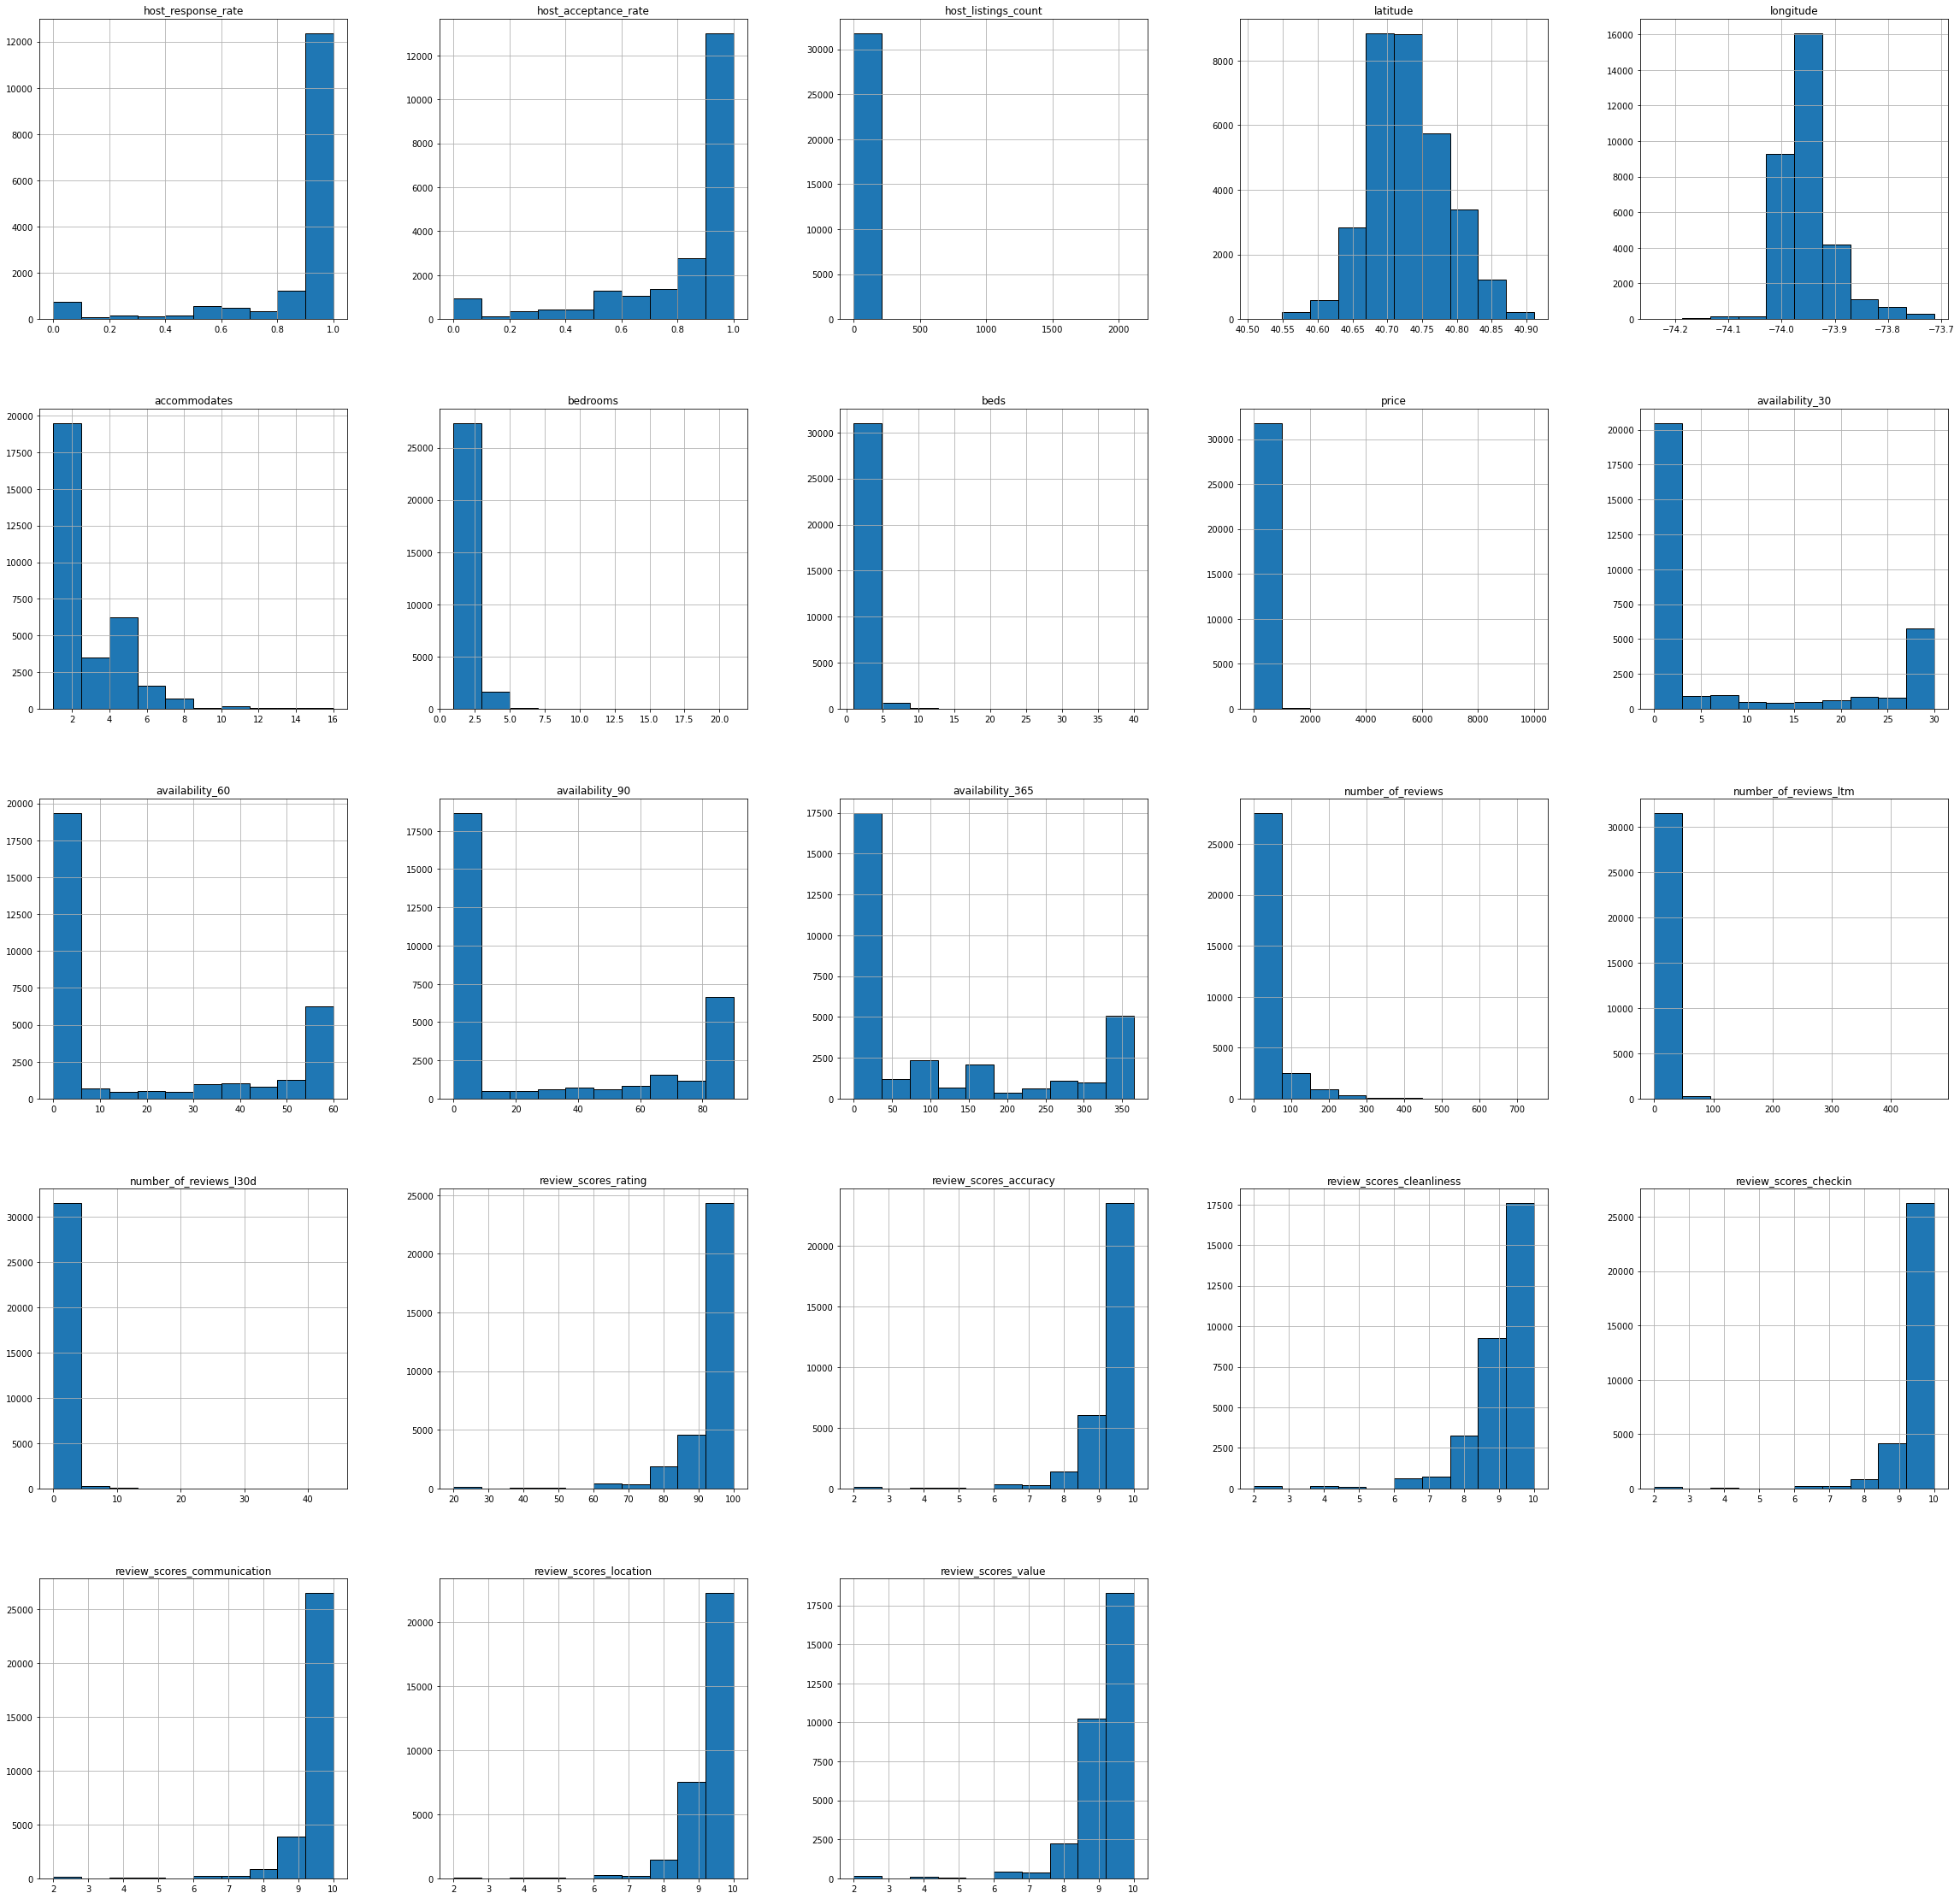

In [98]:
df_new.hist(edgecolor="black", linewidth=1, figsize=(40, 40));

In [99]:
# Create two dataframes that break down the listing data by super host
superhost_listings = listings[listings.host_is_superhost == 't']
not_superhost_listings = listings[listings.host_is_superhost == 'f']

**What is the distribution of prices for hosts and super hosts?**

On average, prices are lower for superhosts. However, we can see that there are a number of outliers, including some listings that are asking $10,000. We investigated a few of these listings to see if they look legitimate.

For example, we found [this listing](https://www.airbnb.com/rooms/13925864?source_impression_id=p3_1605909390_2yUmtCxB2UFi2CK2) which has no pictures of the actual room (2 bedrooms for $10,000/night in Queens). We decided to filter out more expensive listings in order to produce more insightful visualizations.

We can see that there are only 15 listings that are over $1000, which is only 0.3% of the dataset.

For these reasons, we are from this point forward looking at listings that are less than $1000 so that the visualizations are not highly skewed.

In [100]:
len(listings[listings.price > 1000]) / len(listings)

0.003858218318695107

In [101]:
# Examine listings with very high prices
listings[listings.id == 13925864]

id                            listing_url last_scraped  \
14181  13925864  https://www.airbnb.com/rooms/13925864   2020-10-12   

               name                                        description  \
14181  Puerto Plata  Puerto Plata<br /><br /><b>The space</b><br />...   

      neighborhood_overview  \
14181           Muy hermosa   

                                             picture_url   host_id  \
14181  https://a0.muscache.com/pictures/miso/Hosting-...  58480311   

                                         host_url   host_name  ...  \
14181  https://www.airbnb.com/users/show/58480311  Raquel-Ast  ...   

      review_scores_location review_scores_value instant_bookable  \
14181                    9.0                 9.0                f   

      calculated_host_listings_count  \
14181                            1.0   

       calculated_host_listings_count_entire_homes  \
14181                                          1.0   

       calculated_host_listings_count_private_rooms  \
14181                                           0.0   

      calculated_host_listings_count_shared_rooms reviews_per_month  \
14181                                         0.0              0.55   

      is_superhost_numeric host_identity_verified_numeric  
14181                    0                              1  

[1 rows x 62 columns]

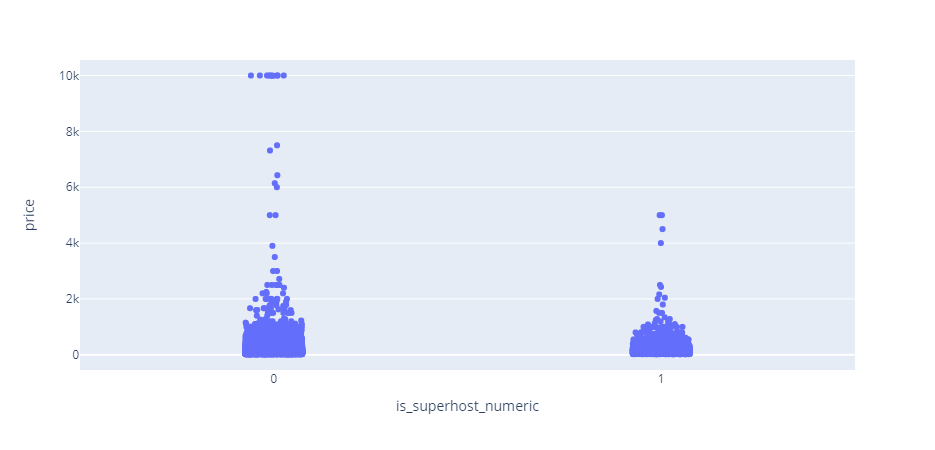

In [146]:
# Analyze the distribution of average listing price by super host
no_na_listings = listings.dropna(subset= ['is_superhost_numeric'])
fig2 = px.strip(no_na_listings, y='price', x='is_superhost_numeric')
fig2.show()

**What is the distribution of listing prices by borough and Superhost?**

We can see that on average, there are more higher price listings in Manhattan compared to Queens and the Bronx which have larger distributions at lower prices.

Also, Superhosts tend to have lower prices on average and much less outliers. For superhosts, the average price is the highest for Manhattan.

Text(0.5, 0, 'NYC Borough')

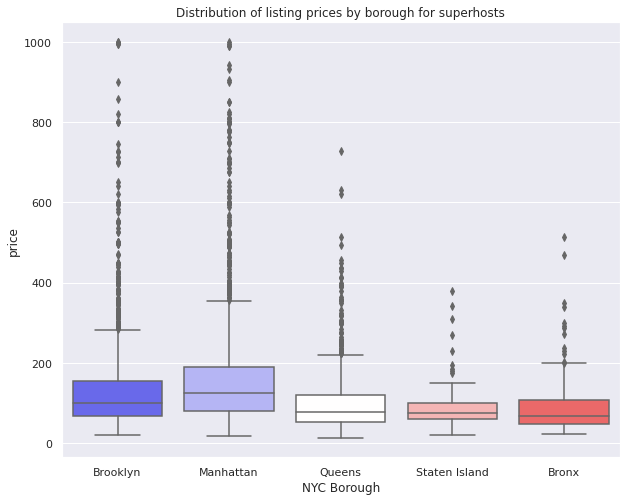

In [103]:
sns.set(rc={'figure.figsize':(10,8)})
sub2=superhost_listings[superhost_listings.price < 1000]
vis1=sns.boxplot(x='neighbourhood_group_cleansed', y='price',data=sub2,palette='bwr')
vis1.set_title('Distribution of listing prices by borough for superhosts')
vis1.set_xlabel('NYC Borough')

Text(0.5, 0, 'NYC Borough')

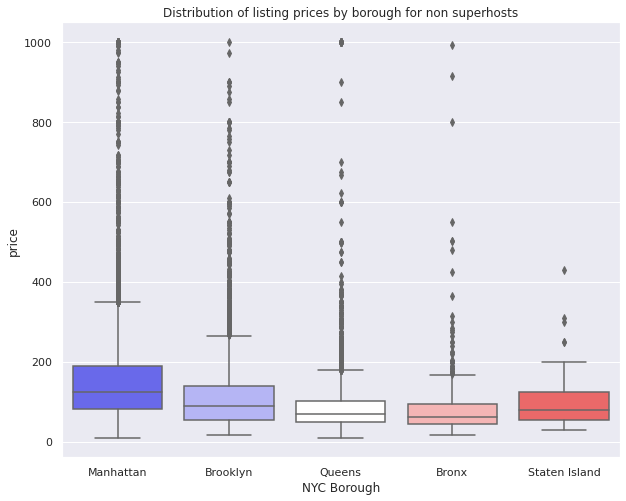

In [104]:
sns.set(rc={'figure.figsize':(10,8)})
sub2=not_superhost_listings[not_superhost_listings.price < 1000]
vis1=sns.boxplot(x='neighbourhood_group_cleansed', y='price',data=sub2,palette='bwr')
vis1.set_title('Distribution of listing prices by borough for non superhosts')
vis1.set_xlabel('NYC Borough')

**What is the distribution of room tpyes in the dataset?**

The most prolific room type is an entire home/apartment, and the least prolific appears to be the hotel room.

We observe a similar trend for both graphs above where both superhosts and non-superhosts have more number of listings that are entire homes and private rooms, as compared to shared rooms and hotel rooms (close to 0 for both superhosts and non-superhosts). A critical observation is that non-superhosts have 68% more listings that are entire homes/apartments than superhosts, and 75% more listings that are private rooms.

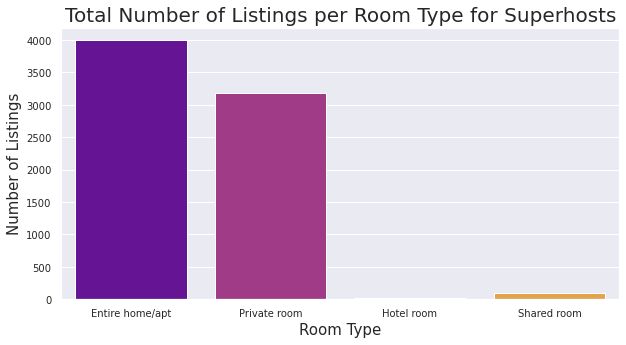

In [148]:
superhost_df = listings[listings.host_is_superhost == 't']
sns.countplot(x='room_type', data=superhost_df, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10, 5)

plt.title('Total Number of Listings per Room Type for Superhosts',fontsize = 20)
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Number of Listings',fontsize = 15)
plt.tick_params(labelsize=10)
plt.show();

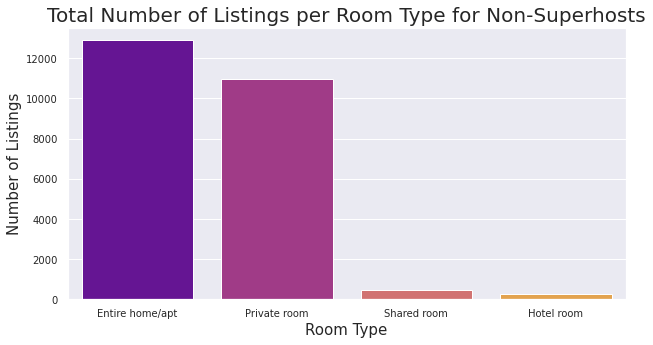

In [149]:
not_superhost_df = listings[listings.host_is_superhost == 'f']
sns.countplot(x='room_type', data=not_superhost_df, palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,5)

plt.title('Total Number of Listings per Room Type for Non-Superhosts',fontsize = 20)
plt.xlabel('Room Type',fontsize = 15)
plt.ylabel('Number of Listings',fontsize = 15)
plt.tick_params(labelsize=10)
plt.show()

**How many listings are there in each borough by room type?**

Hosts either offer their entire home or apartment, private room within their apartment, or a shared space in their room to potential Airbnb guests.
In New York, majority of the hosts offer their entire apartment/home to guests, followed by a private room within their apartment for rent.
In Manhattan & Brooklyn, maximum number of listings offered are that of an entire/home or apartment.
Based on the above observation, we can deduce the nature of the Airbnb hosts by neighbourhood group. Hosts in Manhattan would be looking at the Airbnb listing more as a business opportunity, as they are renting out their entire apartment, viz-a-viz hosts in Queens, Staten Island and Bronx where they would be listing out private rooms as they would be looking to earn extra money/save rent on their own apartment.

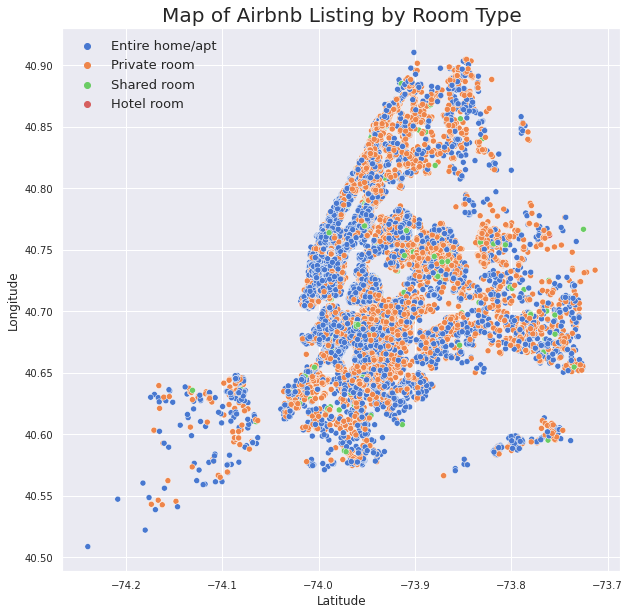

In [107]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=listings, x='longitude', y='latitude', hue='room_type', palette='muted')
plt.title('Map of Airbnb Listing by Room Type', fontsize=20)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel("Longitude",fontsize=12)
plt.legend(frameon=False, fontsize=13)
plt.tick_params(labelsize=10)

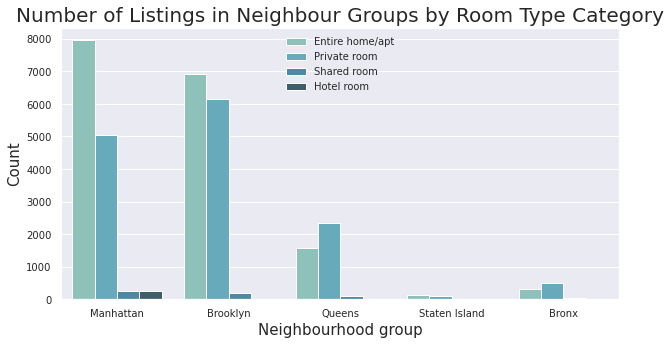

In [108]:
plt.figure(figsize=(10,5))
sns.countplot(data=listings, x='neighbourhood_group_cleansed', hue='room_type', palette='GnBu_d')
plt.title('Number of Listings in Neighbour Groups by Room Type Category', fontsize=20)
plt.xlabel('Neighbourhood group',fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(frameon=False, fontsize=10)
plt.tick_params(labelsize=10)

**Which neighbourhoods have the largest number of listings?**

'Shared room' and 'hotel room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods.
for these 10 neighborhoods only Manhattan and Brooklyn boroughs are represented
Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough and Harlem for Brooklyn.

In [109]:
# Let's figure out just top 10 neighbourhoods that have the most listings in NYC boroughs
# Find out the top 10 neighbourhoods
hot_neighbour = listings.neighbourhood_cleansed.value_counts().head(10)
hot_neighbour

Bedford-Stuyvesant    2499
Williamsburg          2417
Harlem                1834
Bushwick              1497
Upper West Side       1238
Hell's Kitchen        1186
East Village          1144
Upper East Side       1105
Crown Heights         1054
Midtown                944
Name: neighbourhood_cleansed, dtype: int64

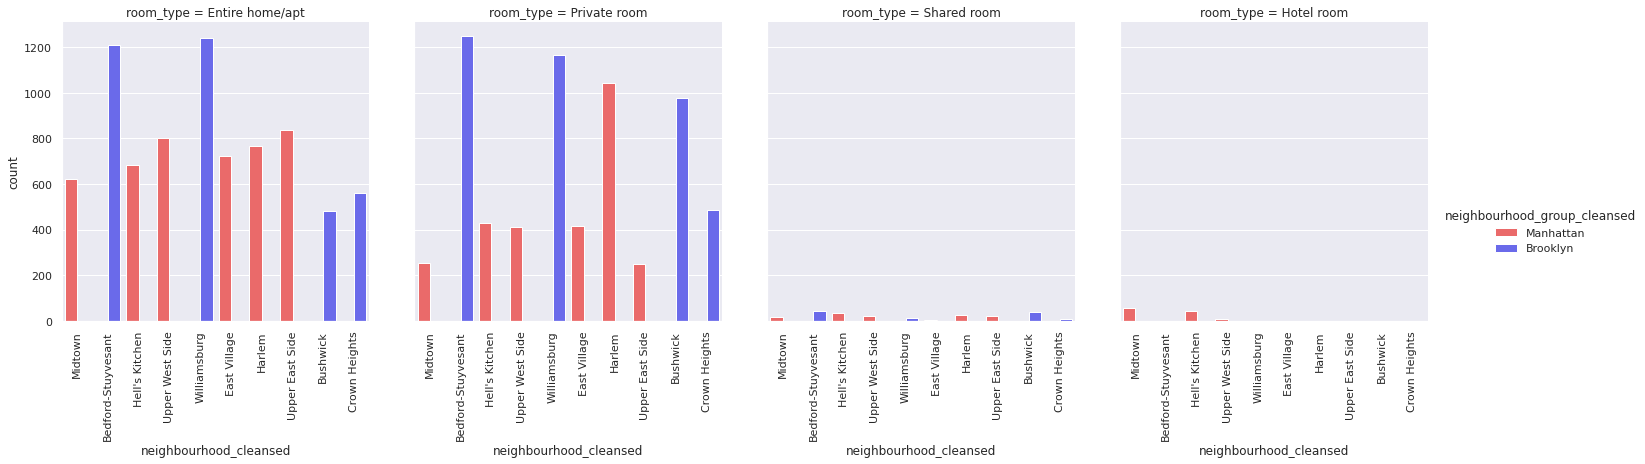

In [110]:
sub1 = listings.loc[listings['neighbourhood_cleansed'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick','Hell\'s Kitchen',
                 'Upper West Side','Upper East Side','East Village','Crown Heights','Midtown'])]
vis1 = sns.catplot(x='neighbourhood_cleansed', hue='neighbourhood_group_cleansed', col='room_type', data=sub1, kind='count',palette='seismic_r')
vis1.set_xticklabels(rotation=90)

The word clouds below display the most prolific words contained in listing descriptions in Manhattan and Brooklyn respectivly.

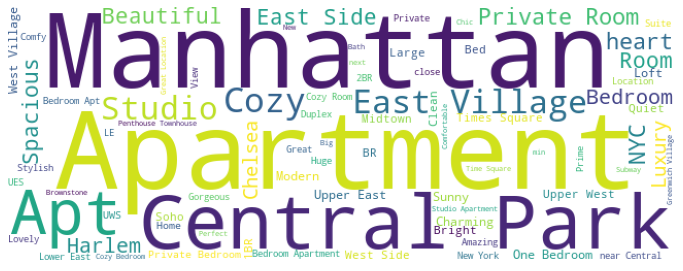

In [111]:
name_manhattan = " ".join(str(w) for w in listings.name[listings.neighbourhood_group_cleansed == "Manhattan"])
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='white',width=650,height=250,max_words=80).generate(name_manhattan)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

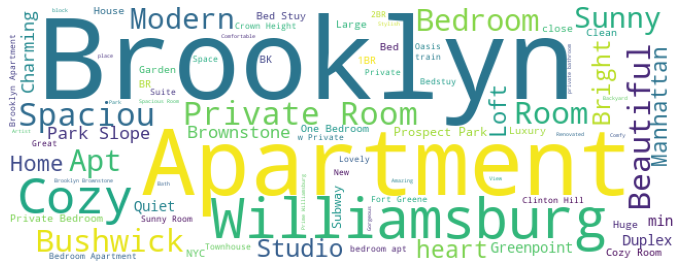

In [113]:
name_brooklyn = " ".join(str(w) for w in listings.name[listings.neighbourhood_group_cleansed == "Brooklyn"])
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='white',width=650,height=250,max_words=80).generate(name_brooklyn)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('name.png')
plt.show()

In [114]:
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(listings[['latitude','longitude']].dropna().values,radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

There are 672 apartments with more than 200 reviews
278 are from Brooklyn followed by 115 in Queens
Manhattan has 256 top reviews apartments

In [150]:
number_of_reviews = listings[(listings.number_of_reviews.isin(range(200,746)))]
m_3 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=11)
# Add points to the map
mc = MarkerCluster()
for idx, row in number_of_reviews.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
m_3.add_child(mc)
# Display the map
m_3

**What is the general availability of listings by super host?**

The general trend observed across listings available across a span of 30, 60, 90 and 365 days is that more number of non-superhosts have their listings available for 30, 60, 90 and 360 days as compared to that of superhosts. We can also observe that superhosts generally don't keep their listings available for too long in the market.

In [119]:
# Remove values in availability columns equal to 0 such that it doesn't get displayed in visualizations
hosts = hosts[(hosts['availability_30'] != 0) & (hosts['availability_60'] != 0) & (hosts['availability_90'] != 0) & (hosts['availability_365'] != 0)]

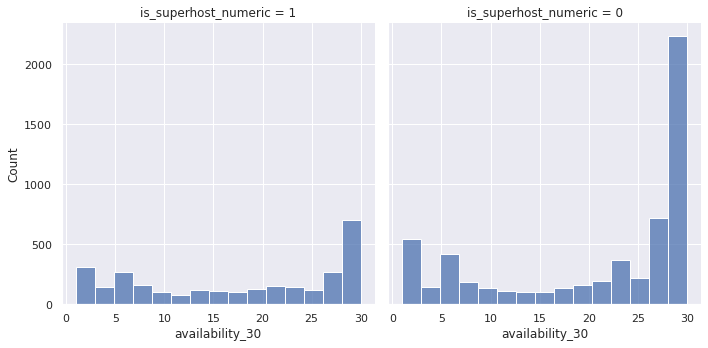

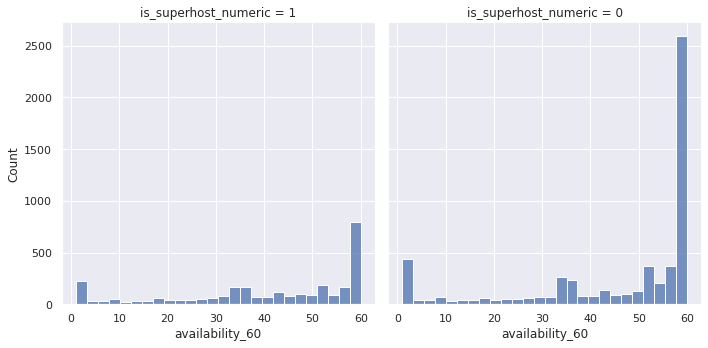

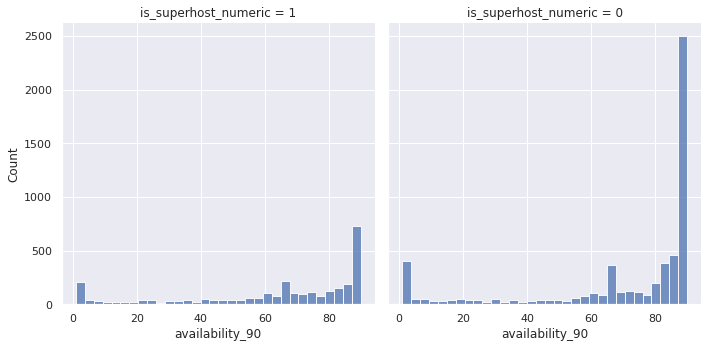

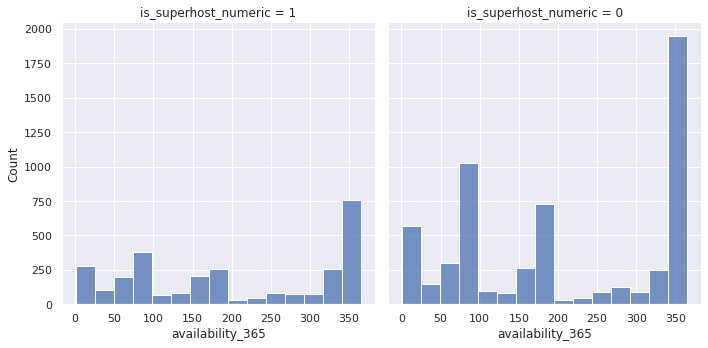

In [120]:
sns.displot(hosts, x="availability_30", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts, x="availability_60", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts, x="availability_90", col="is_superhost_numeric", multiple="dodge")
sns.displot(hosts, x="availability_365", col="is_superhost_numeric", multiple="dodge")

### Host Data Analysis

**How do the number of hosts on Airbnb change from 2009 to 2020?**

One of the features in the data is a date indicating when a host joined Airbnb. Below we create a new dataframe that calculates the cumualative number of hosts on Airbnb. These values are graphed on the line chart below to show how the number of hosts changes over time. We can see that starting in the early days of Airbnb, there was a slow increase in the number of hosts. By 2011 to 2012, this number started to increase greatly, and we can see some leveling off in 2020.

Every observation in our dataset has a recent date indicating when it was last scraped from the site. This means that all of the data in the graph below is from listings that were recently found to be active on Airbnb.

In [121]:
# Create a dataframe with a column for the cumulative number of hosts over time
num_host_by_date = hosts.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
num_host_by_date['host_count_cum'] = num_host_by_date['host_since_count'].cumsum()
num_host_by_date.head()

host_since  host_since_count  host_count_cum
0 2008-09-07                 2               2
1 2008-09-09                 1               3
2 2008-09-10                 1               4
3 2008-10-14                 1               5
4 2008-11-19                 1               6

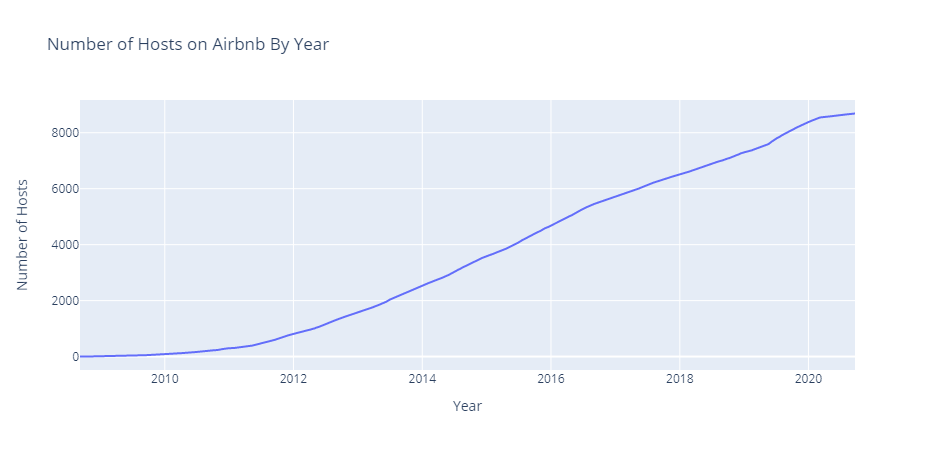

In [122]:
# Display the number of total hosts over time
fig = go.Figure(data=go.Scatter(x=num_host_by_date['host_since'], y=num_host_by_date['host_count_cum']))

fig.update_layout(title='Number of Hosts on Airbnb By Year',
                   xaxis_title='Year',
                   yaxis_title='Number of Hosts')

fig.show()

In [123]:
# Create a dataframe with the number of hosts for each year
resample_by_year = num_host_by_date.set_index('host_since').resample('Y').sum()
resample_by_year['year_cum'] = resample_by_year['host_since_count'].cumsum()
resample_by_year = resample_by_year[['year_cum']].reset_index()

resample_by_year.head()

host_since  year_cum
0 2008-12-31         7
1 2009-12-31        87
2 2010-12-31       296
3 2011-12-31       804
4 2012-12-31      1576

In [124]:
# Create a dataframe with the cumulative number of super hosts by date
num_super_host_by_date = is_super_df.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
num_super_host_by_date['host_count_cum'] = num_super_host_by_date['host_since_count'].cumsum()

# Resample by year
super_host_resample_by_year = num_super_host_by_date.set_index('host_since').resample('Y').sum()
super_host_resample_by_year['year_cum'] = super_host_resample_by_year['host_since_count'].cumsum()
super_host_resample_by_year = super_host_resample_by_year[['year_cum']].reset_index()

super_host_resample_by_year.head()

host_since  year_cum
0 2008-12-31         5
1 2009-12-31        46
2 2010-12-31       181
3 2011-12-31       515
4 2012-12-31      1020

In [125]:
# Create a dataframe with the cumulative number of non super hosts by date
not_super_host_by_date = not_super_df.groupby('host_since')[['host_id']].count().reset_index().rename(columns={'host_id': 'host_since_count'})
not_super_host_by_date['host_count_cum'] = not_super_host_by_date['host_since_count'].cumsum()

# Resample by year
not_super_host_resample_by_year = not_super_host_by_date.set_index('host_since').resample('Y').sum()
not_super_host_resample_by_year['year_cum'] = not_super_host_resample_by_year['host_since_count'].cumsum()
not_super_host_resample_by_year = not_super_host_resample_by_year[['year_cum']].reset_index()

not_super_host_resample_by_year.head()

host_since  year_cum
0 2008-12-31         5
1 2009-12-31       128
2 2010-12-31       530
3 2011-12-31      1650
4 2012-12-31      3701

**How do the number of super hosts vs non super hosts on Airbnb change from 2009 to 2020?**

In order to create the bar graph below, we created dataframes with the number of hosts on the site resampled by the year. The bar graph is a breakdown of the total number of hosts, the number of regular hosts, and the number of super hosts for every year. Again, we can see a pretty steady increase across all of the years, and then a slow leveling off towards the end of the range.

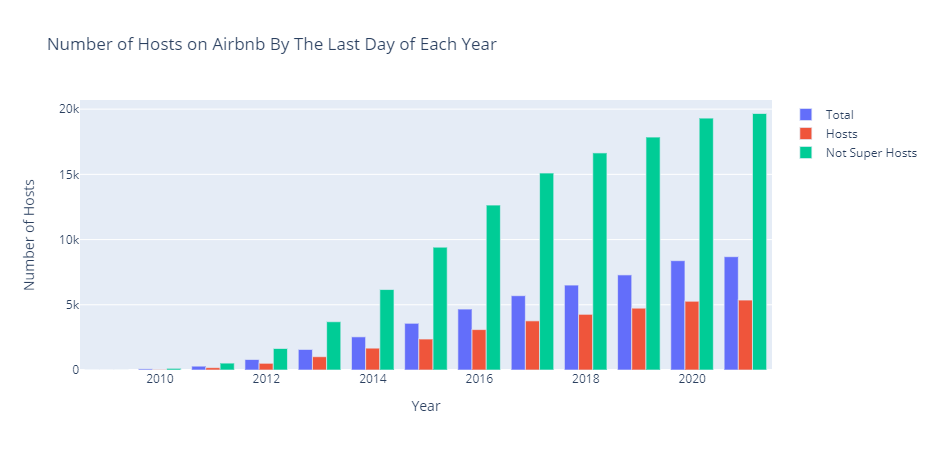

In [126]:
# Create a combines bar graph of the number of super hosts and non super hosts by year
dates = super_host_resample_by_year['host_since']

fig = go.Figure(data=[
    go.Bar(name='Total', x=dates, y=resample_by_year['year_cum']),
    go.Bar(name='Hosts', x=dates, y=super_host_resample_by_year['year_cum']),
    go.Bar(name='Not Super Hosts', x=dates, y=not_super_host_resample_by_year['year_cum'])
])

# Change the bar mode
fig.update_layout(barmode='group')

fig.update_layout(title='Number of Hosts on Airbnb By The Last Day of Each Year',
                   xaxis_title='Year',
                   yaxis_title='Number of Hosts')

fig.show()

**What is the proportion of hosts who are verified vs not verified?**

We can see that the majority of Airbnb hosts are verified. Identity verification, which is [explained here](https://www.airbnb.com/press/news/airbnb-announces-verified-identification), invovles a host uploading an image of their ID to ensure that they are who they say they are. We can see that the majority of Airbnb hosts have this additional safety feature.

In [127]:
# find the count of hosts that have their identity verified
identity_verified = hosts['host_identity_verified_numeric'].value_counts()
identity_verified_df = pd.DataFrame(identity_verified).reset_index().rename(columns={'index':'verified','host_identity_verified_numeric':'host_count'})
labels = ['Verified', 'Not Verified']

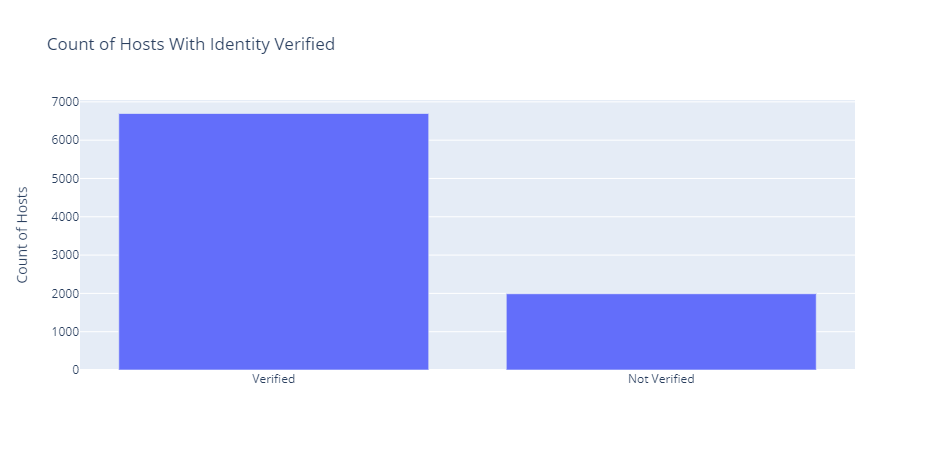

In [128]:
fig = go.Figure([go.Bar(x=labels, y=identity_verified_df['host_count'])])

fig.update_layout(title='Count of Hosts With Identity Verified', yaxis_title='Count of Hosts')

fig.show()

**What are the top 5 hosts and their locations?**

The below visualization shows the locations of Airbnb listings belonging to the top 5 hosts based on the number of listings that they have on the site. The top host, Stay With Vibe, has 103 listings all over Manhattan. These listings primarily cost less than $200 per night.

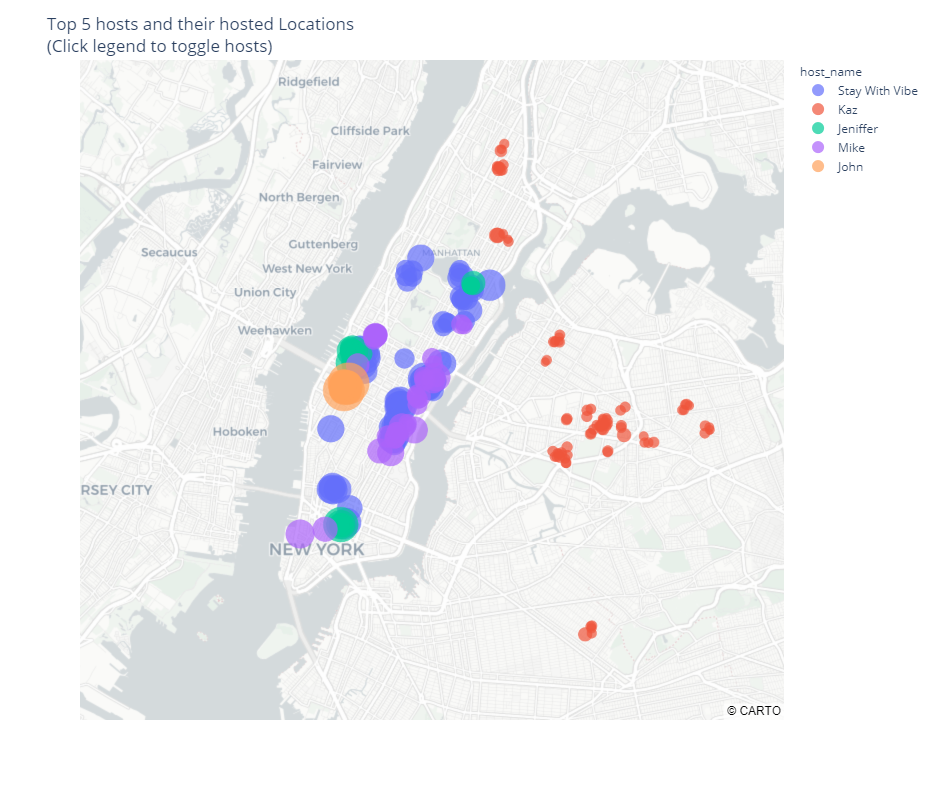

In [129]:
sub5 = listings.host_id.value_counts().reset_index().head(5)
sub5.columns = ['host_id', 'count']
sub5 = sub5.merge(listings[['host_id','host_name','price', 'latitude','longitude']], left_on = 'host_id',right_on = 'host_id', how = 'left', copy = False)
fig = px.scatter_mapbox(sub5,lat="latitude",lon="longitude",color="host_name",size="price",size_max=30,opacity = .70,zoom=11)
fig.layout.mapbox.style = 'carto-positron'
fig.update_layout(title_text = 'Top 5 hosts and their hosted Locations<br>(Click legend to toggle hosts)', height = 800)

## Reviews Analysis

**How many reviews were there in each year?**

The number of comments posted increased over time and 2019 has the most comments posted. After COVID outbreak, the number of comments posted dropped. This is most likely the result of travel restrictions and the decrease in demand for rooms.

In [130]:
reviews.groupby('year')['comments'].count()

year
2009       108
2010       810
2011      3392
2012      7271
2013     14256
2014     28681
2015     57758
2016    101692
2017    149859
2018    223499
2019    314201
2020    100856
Name: comments, dtype: int64

Here is a visualization of this trend. We can see a drastic change in number between 2019 and 2020.

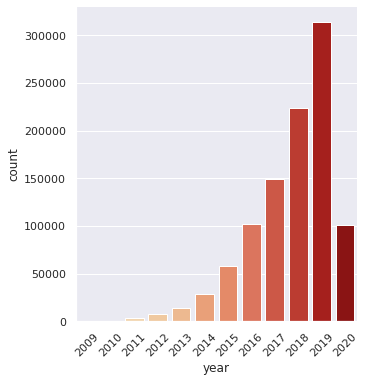

In [131]:
sns.catplot(x='year', data=reviews, kind='count', palette='OrRd')
plt.xticks(rotation=45)
plt.show();

**How many comments were posted each month in 2019 and 2020?**

Below is a visualization of the distribution of the number of comments posted in 2019 and 2020. We can see that September, October and December usually have the most comments posted.

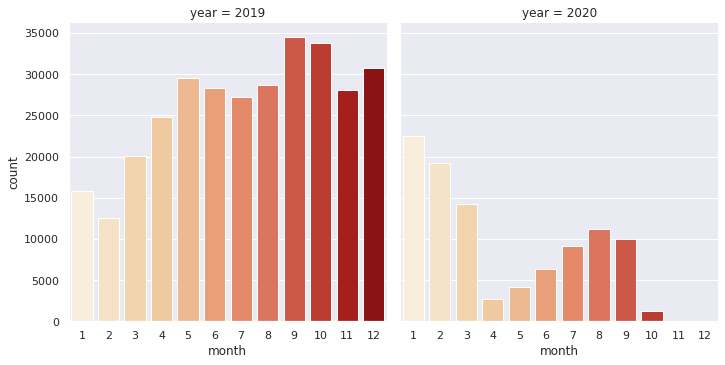

In [132]:
reviews_19_20 = reviews[(reviews['year']==2019) | (reviews['year']==2020)]
sns.catplot(x='month', data=reviews_19_20, kind='count', col='year', palette='OrRd')
plt.show();

**Who posted the most comments?**

Below are the five users that posted the most comments throughout the years. The top reviewer Elizabeth has posted 96 comments so far.

In [133]:
comments_count = reviews.groupby(['reviewer_id', 'reviewer_name'], as_index=True).agg({'comments':'count'}).sort_values(by='comments', ascending=False)
comments_count.head()

comments
reviewer_id reviewer_name          
111293458   Elizabeth            96
71164558    Linda                79
563572      Daniel               66
63643121    Seth                 66
115868650   Ken                  61

**A glimpse into what the top reviewers said.**

It appears that Elizabeth usually leaves positive comments.

<Figure size 720x576 with 0 Axes>

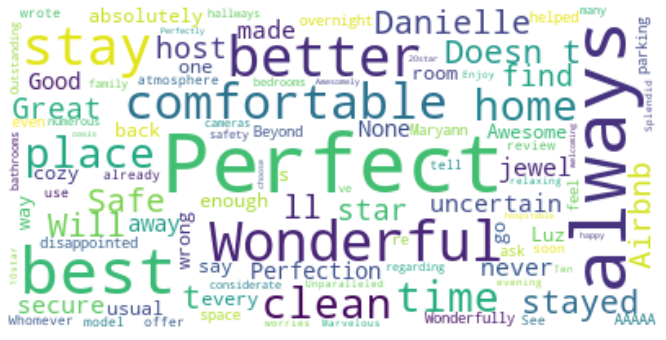

In [134]:
comments = reviews[reviews['reviewer_id']==111293458]['comments'].reset_index()

text = ""
for i in range(len(comments)):
    text = text + " " + str(comments['comments'][i])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

**Which listing received the most reviews?**

Below are the five listings that received the most comments throughout the years. Listing ID 32678719 has received 743 comments in total.


In [135]:
reviews.groupby('listing_id').agg({'comments': 'count'}).sort_values(by='comments', ascending=False).head()

comments
listing_id          
32678719         743
9145202          695
10101135         646
16276632         628
15262831         572

**A glimpse into the comments that the top listing received.**

It appears that this listing (presumably near Times Square) received more comments on its "great location", cleaniness, and other compliments.

<Figure size 720x576 with 0 Axes>

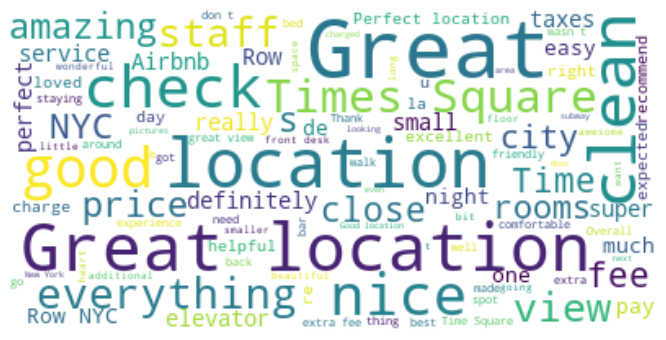

In [136]:
listing_review = reviews[reviews['listing_id']==32678719]['comments'].reset_index()

text = ""
for i in range(len(listing_review)):
    text = text + " " + str(listing_review['comments'][i])

stopwords = set(STOPWORDS)
stopwords.add('room')
stopwords.add('hotel')
stopwords.add('place')
stopwords.add('will')
stopwords.add('stay')
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

**How many listings received the lowest rating?**

The lowest average rating a listing received is 20 and there are 137 listings who received it.

In [137]:
lowest = listings.review_scores_rating.min()
worst_id = listings[listings.review_scores_rating==lowest]['id']
print(lowest)
print(len(worst_id))

20.0
137


**A glimpse into the comments on these listings.**

It appears that most comments these listings received were complaints against the hosts, reservations being cancelled, and the bathrooms.

<Figure size 720x576 with 0 Axes>

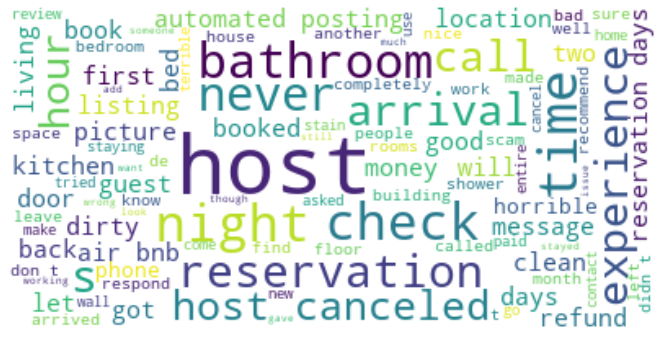

In [138]:
worst_review = reviews[reviews['listing_id'].isin(worst_id)]['comments'].reset_index()

text = ""
for i in range(len(worst_review)):
    text = text + " " + str(worst_review['comments'][i])

stopwords = set(STOPWORDS)
stopwords.add('Airbnb')
stopwords.add('place')
stopwords.add('said')
stopwords.add('really')
stopwords.add('us')
stopwords.add('even')
stopwords.add('told')
stopwords.add('one')
stopwords.add('apartment')
stopwords.add('hotel')
stopwords.add('room')
stopwords.add('day')
stopwords.add('stay')
wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();

##  Calendar Analysis

**What is the distribution of the minimum nights and maximum nights set by super hosts and non super hosts?**


No handles with labels found to put in legend.


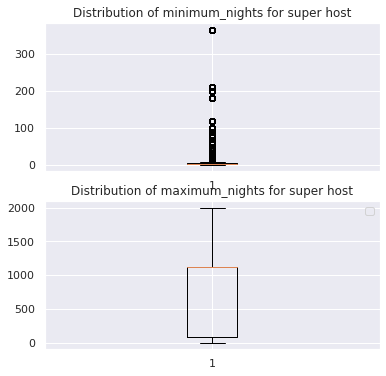

In [139]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(6,6))  
axes[0].boxplot(calendar_super_drop['minimum_nights'])
axes[0].set_title("Distribution of minimum_nights for super host")
axes[1].boxplot(calendar_super_drop['maximum_nights'])
axes[1].set_title("Distribution of maximum_nights for super host")
plt.legend()
plt.show()

No handles with labels found to put in legend.


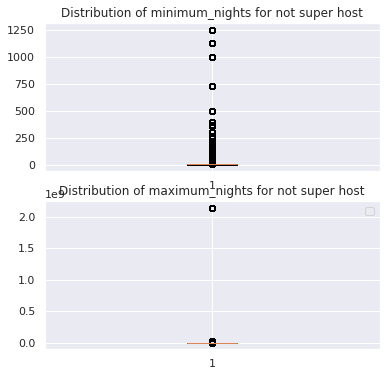

In [140]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(6,6))  
axes[0].boxplot(calendar_not_super_drop['minimum_nights'])
axes[0].set_title("Distribution of minimum_nights for not super host")
axes[1].boxplot(calendar_not_super_drop['maximum_nights'])
axes[1].set_title("Distribution of maximum_nights for not super host")
plt.legend()
plt.show()

**How the average room price change in 2018 and 2019?**

* From these two visualizations, we can draw conclusions that super hosts' average room price is higher than not super hosts. 
* The average room price during weekend is higher than it is during weekdays. 
* We can also notice the trend that the average room price increase gradually from January to July. Between July and December, the average room price fluctuated in a relatively stable range. The average room price gets to the maximum.

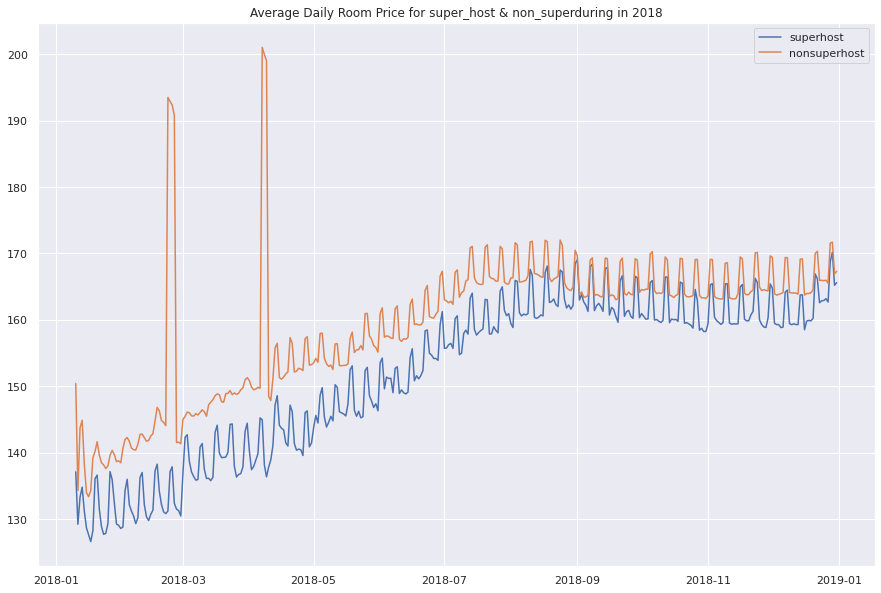

In [141]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2018_super_ts["date"],calendar_2018_super_ts["price"],label="superhost")
axes.plot(calendar_2018_not_super_ts["date"],calendar_2018_not_super_ts["price"],label="nonsuperhost")
axes.set_title("Average Daily Room Price for super_host & non_superduring in 2018")
plt.legend()
plt.show()

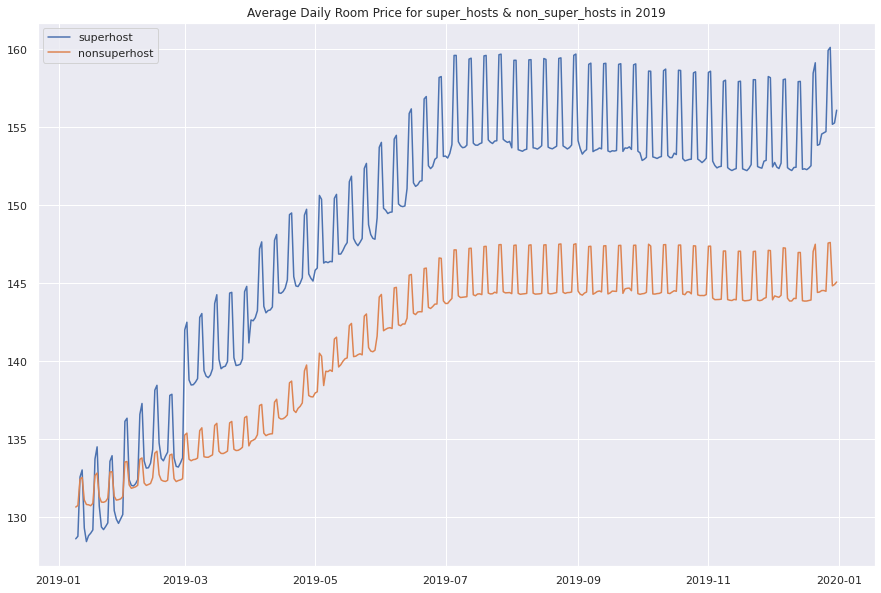

In [142]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2019_super_ts["date"],calendar_2019_super_ts["price"],label="superhost")
axes.plot(calendar_2019_not_super_ts["date"],calendar_2019_not_super_ts["price"],label="nonsuperhost")
axes.set_title("Average Daily Room Price for super_hosts & non_super_hosts in 2019")
plt.legend()
plt.show()

**How COVID-19 affect hosts' prediction about their room price?**

* From this chart we can see that in January, when COVID-19 didn't hit U.S., hosts' prediction about their room price follows the trends we saw earlier. 
* When it comes to March, hosts' prediction about their room price in March is lower than what they expected in January. It increased a little in April, and went back to normal in May. 
* When it came to July, hosts' prediction about their room price in July is much lower than what they expected in January and March, it went back to normal in December.

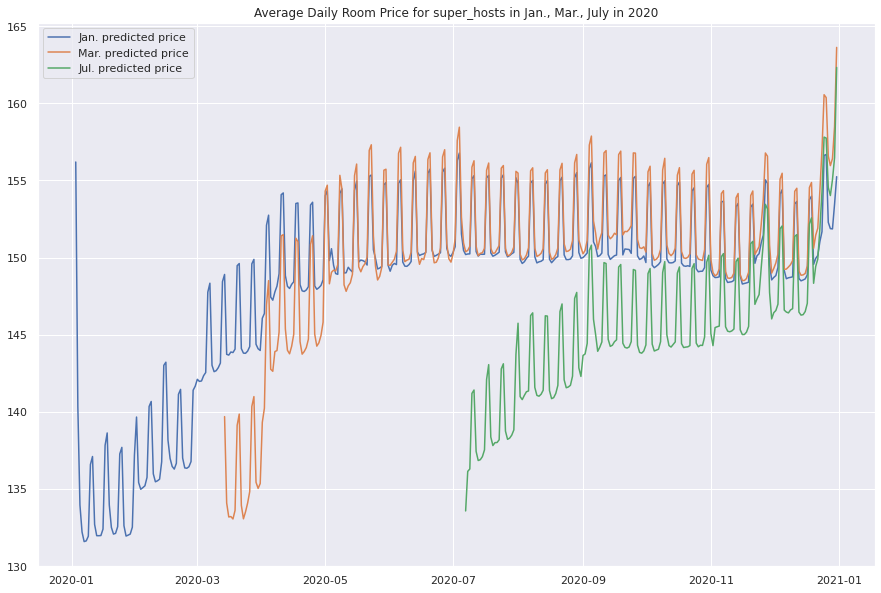

In [143]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2020_1_f["date"],calendar_2020_1_f["price"],label="Jan. predicted price")
axes.plot(calendar_2020_3_f["date"],calendar_2020_3_f["price"],label="Mar. predicted price")
axes.plot(calendar_2020_7_f["date"],calendar_2020_7_f["price"],label="Jul. predicted price")
axes.set_title("Average Daily Room Price for super_hosts in Jan., Mar., July in 2020")
plt.legend()
plt.show()

**Does hosts' prediction about their average price follow the same trend in 2019?**
 
In 2019, we can see that average room price hosts predicted in March and July is a little different than what they predicted in January. However, we think the price fluctuation is reasonable. So based on this, we assume COVID-19 situation affect the average room price. 

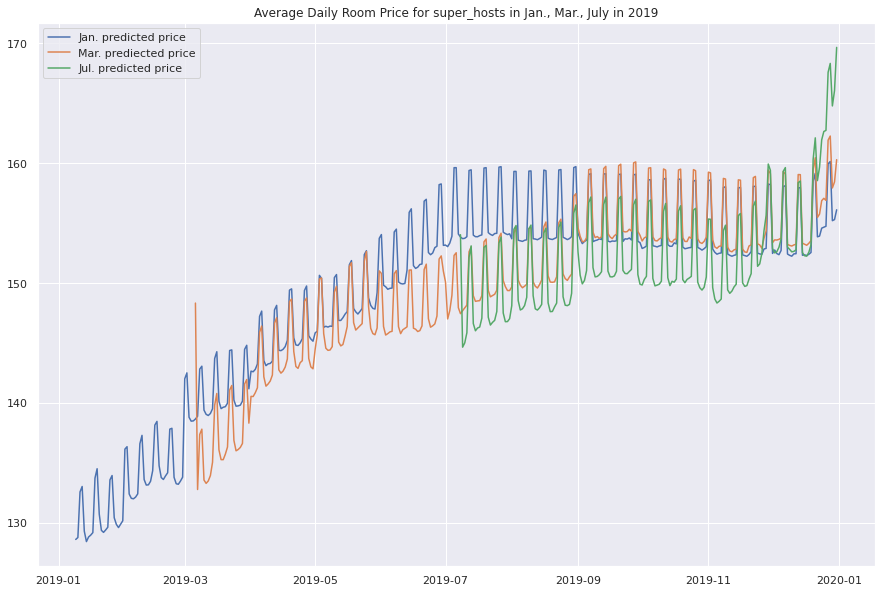

In [144]:
fig, axes = plt.subplots(figsize=(15,10))  
axes.plot(calendar_2019_super_ts["date"],calendar_2019_super_ts["price"],label="Jan. predicted price")
axes.plot(calendar_2019_3_f["date"],calendar_2019_3_f["price"],label="Mar. prediected price")
axes.plot(calendar_2019_7_f["date"],calendar_2019_7_f["price"],label="Jul. predicted price")
axes.set_title("Average Daily Room Price for super_hosts in Jan., Mar., July in 2019")
plt.legend()
plt.show()